# Enery Optimization For Smart Homes
In this notebook, we are going to complete a remarkle work for smart homes.
## Data
The data is downloaded from Kaggle : https://www.kaggle.com/code/koheimuramatsu/change-detection-forecasting-in-smart-home/input
## Features
##### Index
- **time**
    * Time of the readings, with a time span of 1 minute.

##### Energy Usage
- **use [kW]**
    * Total energy consumption
- **gen [kW]**
    * Total energy generated by means of solar or other power generation resources
- **House overall [kW]**
    * overall house energy consumption
- **Dishwasher [kW]**
    * energy consumed by specific appliance
- **Furnace 1 [kW]**
    * energy consumed by specific appliance
- **Furnace 2 [kW]**
    * energy consumed by specific appliance
- **Home office [kW]**
    * energy consumed by specific appliance
- **Fridge [kW]**
    * energy consumed by specific appliance
- **Wine cellar [kW]**
    * energy consumed by specific appliance
- **Garage door [kW]**
    * energy consumed by specific appliance
- **Kitchen 12 [kW]**
    * energy consumption in kitchen 1
- **Kitchen 14 [kW]**
    * energy consumption in kitchen 2
- **Kitchen 38 [kW]**
    * energy consumption in kitchen 3
- **Barn [kW]**
    * energy consumed by specific appliance
- **Well [kW]**
    * energy consumed by specific appliance
- **Microwave [kW]**
    * energy consumed by specific appliance
- **Living room [kW]**
    * energy consumption in Living room
- **Solar [kW]**
    * Solar power generation

##### Weather
- **temperature**:
    * emperature is a physical quantity expressing hot and cold.
- **humidity**:
    * Humidity is the concentration of water vapour present in air.
- **visibility**:
    * Visibility sensors measure the meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value.

- **apparentTemperature**:
    * Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature.
- **pressure**:
    * Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather
- **windSpeed**:
    * Wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature.
- **cloudCover**:
    * Cloud cover (also known as cloudiness, cloudage, or cloud amount) refers to the fraction of the sky obscured by clouds when observed from a particular location. Okta is the usual unit of measurement of the cloud cover.
- **windBearing**:
    * In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."
- **dewPoint**:
    * the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.
- **precipProbability**:
    * A probability of precipitation (POP), also referred to as chance of precipitation or chance of rain, is a measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast period and location.
- **precipIntensity**:
    * The intensity of rainfall is a measure of the amount of rain that falls over time. The intensity of rain is measured in the height of the water layer covering the ground in a period of time. It means that if the rain stays where it falls, it would form a layer of a certain height.

##### Others
- **summary**:
    * Report generated by the by the data collection system (apparently!).
    * Including:
    ```
       Clear, Mostly Cloudy, Overcast, Partly Cloudy, Drizzle,
       Light Rain, Rain, Light Snow, Flurries, Breezy, Snow,
       Rain and Breezy, Foggy, Breezy and Mostly Cloudy,
       Breezy and Partly Cloudy, Flurries and Breezy, Dry,
       Heavy, Snow.
    ```
- **icon**:
    * The icon that is used by the data collection system (apparently!).
    * Including:
    ```
    cloudy, clear-night, partly-cloudy-night, clear-day, partly-cloudy-day, rain, snow, wind, fog.
    ```

## Get Data Ready

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Import data
df = pd.read_csv("Data/HomeC.csv",
                 low_memory=False)

In [ ]:
# Check Columns
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [ ]:
# Get info from dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [ ]:
# Look at dataFrame
df.head().T

0            1            2            3  \
time                  1451624400   1451624401   1451624402   1451624403   
use [kW]                0.932833     0.934333     0.931817      1.02205   
gen [kW]                0.003483     0.003467     0.003467     0.003483   
House overall [kW]      0.932833     0.934333     0.931817      1.02205   
Dishwasher [kW]         0.000033          0.0     0.000017     0.000017   
Furnace 1 [kW]            0.0207     0.020717       0.0207       0.1069   
Furnace 2 [kW]          0.061917     0.063817     0.062317     0.068517   
Home office [kW]        0.442633     0.444067     0.446067     0.446583   
Fridge [kW]              0.12415        0.124     0.123533     0.123133   
Wine cellar [kW]        0.006983     0.006983     0.006983     0.006983   
Garage door [kW]        0.013083     0.013117     0.013083        0.013   
Kitchen 12 [kW]         0.000417     0.000417     0.000433     0.000433   
Kitchen 14 [kW]          0.00015      0.00015     0.000167     0.000217   
Kitchen 38 [kW]              0.0          0.0     0.000017          0.0   
Barn [kW]                0.03135       0.0315     0.031517       0.0315   
Well [kW]               0.001017     0.001017        0.001     0.001017   
Microwave [kW]          0.004067     0.004067     0.004067     0.004067   
Living room [kW]        0.001517      0.00165      0.00165     0.001617   
Solar [kW]              0.003483     0.003467     0.003467     0.003483   
temperature                36.14        36.14        36.14        36.14   
icon                 clear-night  clear-night  clear-night  clear-night   
humidity                    0.62         0.62         0.62         0.62   
visibility                  10.0         10.0         10.0         10.0   
summary                    Clear        Clear        Clear        Clear   
apparentTemperature        29.26        29.26        29.26        29.26   
pressure                 1016.91      1016.91      1016.91      1016.91   
windSpeed                   9.18         9.18         9.18         9.18   
cloudCover            cloudCover   cloudCover   cloudCover   cloudCover   
windBearing                282.0        282.0        282.0        282.0   
precipIntensity              0.0          0.0          0.0          0.0   
dewPoint                    24.4         24.4         24.4         24.4   
precipProbability            0.0          0.0          0.0          0.0   

                               4  
time                  1451624404  
use [kW]                  1.1394  
gen [kW]                0.003467  
House overall [kW]        1.1394  
Dishwasher [kW]         0.000133  
Furnace 1 [kW]          0.236933  
Furnace 2 [kW]          0.063983  
Home office [kW]        0.446533  
Fridge [kW]              0.12285  
Wine cellar [kW]         0.00685  
Garage door [kW]        0.012783  
Kitchen 12 [kW]          0.00045  
Kitchen 14 [kW]         0.000333  
Kitchen 38 [kW]              0.0  
Barn [kW]                 0.0315  
Well [kW]               0.001017  
Microwave [kW]          0.004067  
Living room [kW]        0.001583  
Solar [kW]              0.003467  
temperature                36.14  
icon                 clear-night  
humidity                    0.62  
visibility                  10.0  
summary                    Clear  
apparentTemperature        29.26  
pressure                 1016.91  
windSpeed                   9.18  
cloudCover            cloudCover  
windBearing                282.0  
precipIntensity              0.0  
dewPoint                    24.4  
precipProbability            0.0

In [ ]:
# Python string method replace() returns a copy of the string in which the occurrences of old have been replaced with new, optionally restricting the number of replacements to max.
df.columns = [col.replace(' [kW]', '') for col in df.columns]
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [ ]:
# Get object class attributes
object = df.select_dtypes(include=['object']).columns.tolist()
object

['time', 'icon', 'summary', 'cloudCover']

In [ ]:
# Check examples of time attribute
df.time.head()

0    1451624400
1    1451624401
2    1451624402
3    1451624403
4    1451624404
Name: time, dtype: object

In [ ]:
# Time is not desired form convert it into desired one.
import time
time_index = pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min') # These information based on data source.
time_index = pd.DatetimeIndex(time_index)
df['time'] = time_index
df.iloc[np.r_[0:5,-5:0]].iloc[:,0]

0        2016-01-01 05:00:00
1        2016-01-01 05:01:00
2        2016-01-01 05:02:00
3        2016-01-01 05:03:00
4        2016-01-01 05:04:00
503906   2016-12-16 03:26:00
503907   2016-12-16 03:27:00
503908   2016-12-16 03:28:00
503909   2016-12-16 03:29:00
503910   2016-12-16 03:30:00
Name: time, dtype: datetime64[ns]

In [ ]:
# Save original data in case of undesired losses
df_tmp = df.copy()

In [ ]:
# Process of time is over.
object.remove('time')
cat_attr = object

In [ ]:
# Check missing values
df_tmp.isna().sum()

time                   0
use                    1
gen                    1
House overall          1
Dishwasher             1
Furnace 1              1
Furnace 2              1
Home office            1
Fridge                 1
Wine cellar            1
Garage door            1
Kitchen 12             1
Kitchen 14             1
Kitchen 38             1
Barn                   1
Well                   1
Microwave              1
Living room            1
Solar                  1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [ ]:
# Check data none value distribution
for column in df_tmp.columns:
    unique_values = df_tmp[column].unique()
    print(f"for {column} unique values: {unique_values}")

for time unique values: <DatetimeArray>
['2016-01-01 05:00:00', '2016-01-01 05:01:00', '2016-01-01 05:02:00',
 '2016-01-01 05:03:00', '2016-01-01 05:04:00', '2016-01-01 05:05:00',
 '2016-01-01 05:06:00', '2016-01-01 05:07:00', '2016-01-01 05:08:00',
 '2016-01-01 05:09:00',
 ...
 '2016-12-16 03:21:00', '2016-12-16 03:22:00', '2016-12-16 03:23:00',
 '2016-12-16 03:24:00', '2016-12-16 03:25:00', '2016-12-16 03:26:00',
 '2016-12-16 03:27:00', '2016-12-16 03:28:00', '2016-12-16 03:29:00',
 '2016-12-16 03:30:00']
Length: 503911, dtype: datetime64[ns]
for use unique values: [0.93283333 0.93433333 0.93181667 ... 1.55181667 1.92426667        nan]
for gen unique values: [0.00348333 0.00346667 0.00343333 ... 0.1532     0.2099            nan]
for House overall unique values: [0.93283333 0.93433333 0.93181667 ... 1.55181667 1.92426667        nan]
for Dishwasher unique values: [3.33000000e-05 0.00000000e+00 1.67000000e-05 ... 1.36833333e+00
 1.13683333e+00            nan]
for Furnace 1 unique values

In [ ]:
# The last row cause Nan values remove it from dataFrame
df_tmp = df_tmp[:-1]
time_index=time_index[:-1]
df_tmp.isna().sum()

time                   0
use                    0
gen                    0
House overall          0
Dishwasher             0
Furnace 1              0
Furnace 2              0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Kitchen 12             0
Kitchen 14             0
Kitchen 38             0
Barn                   0
Well                   0
Microwave              0
Living room            0
Solar                  0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

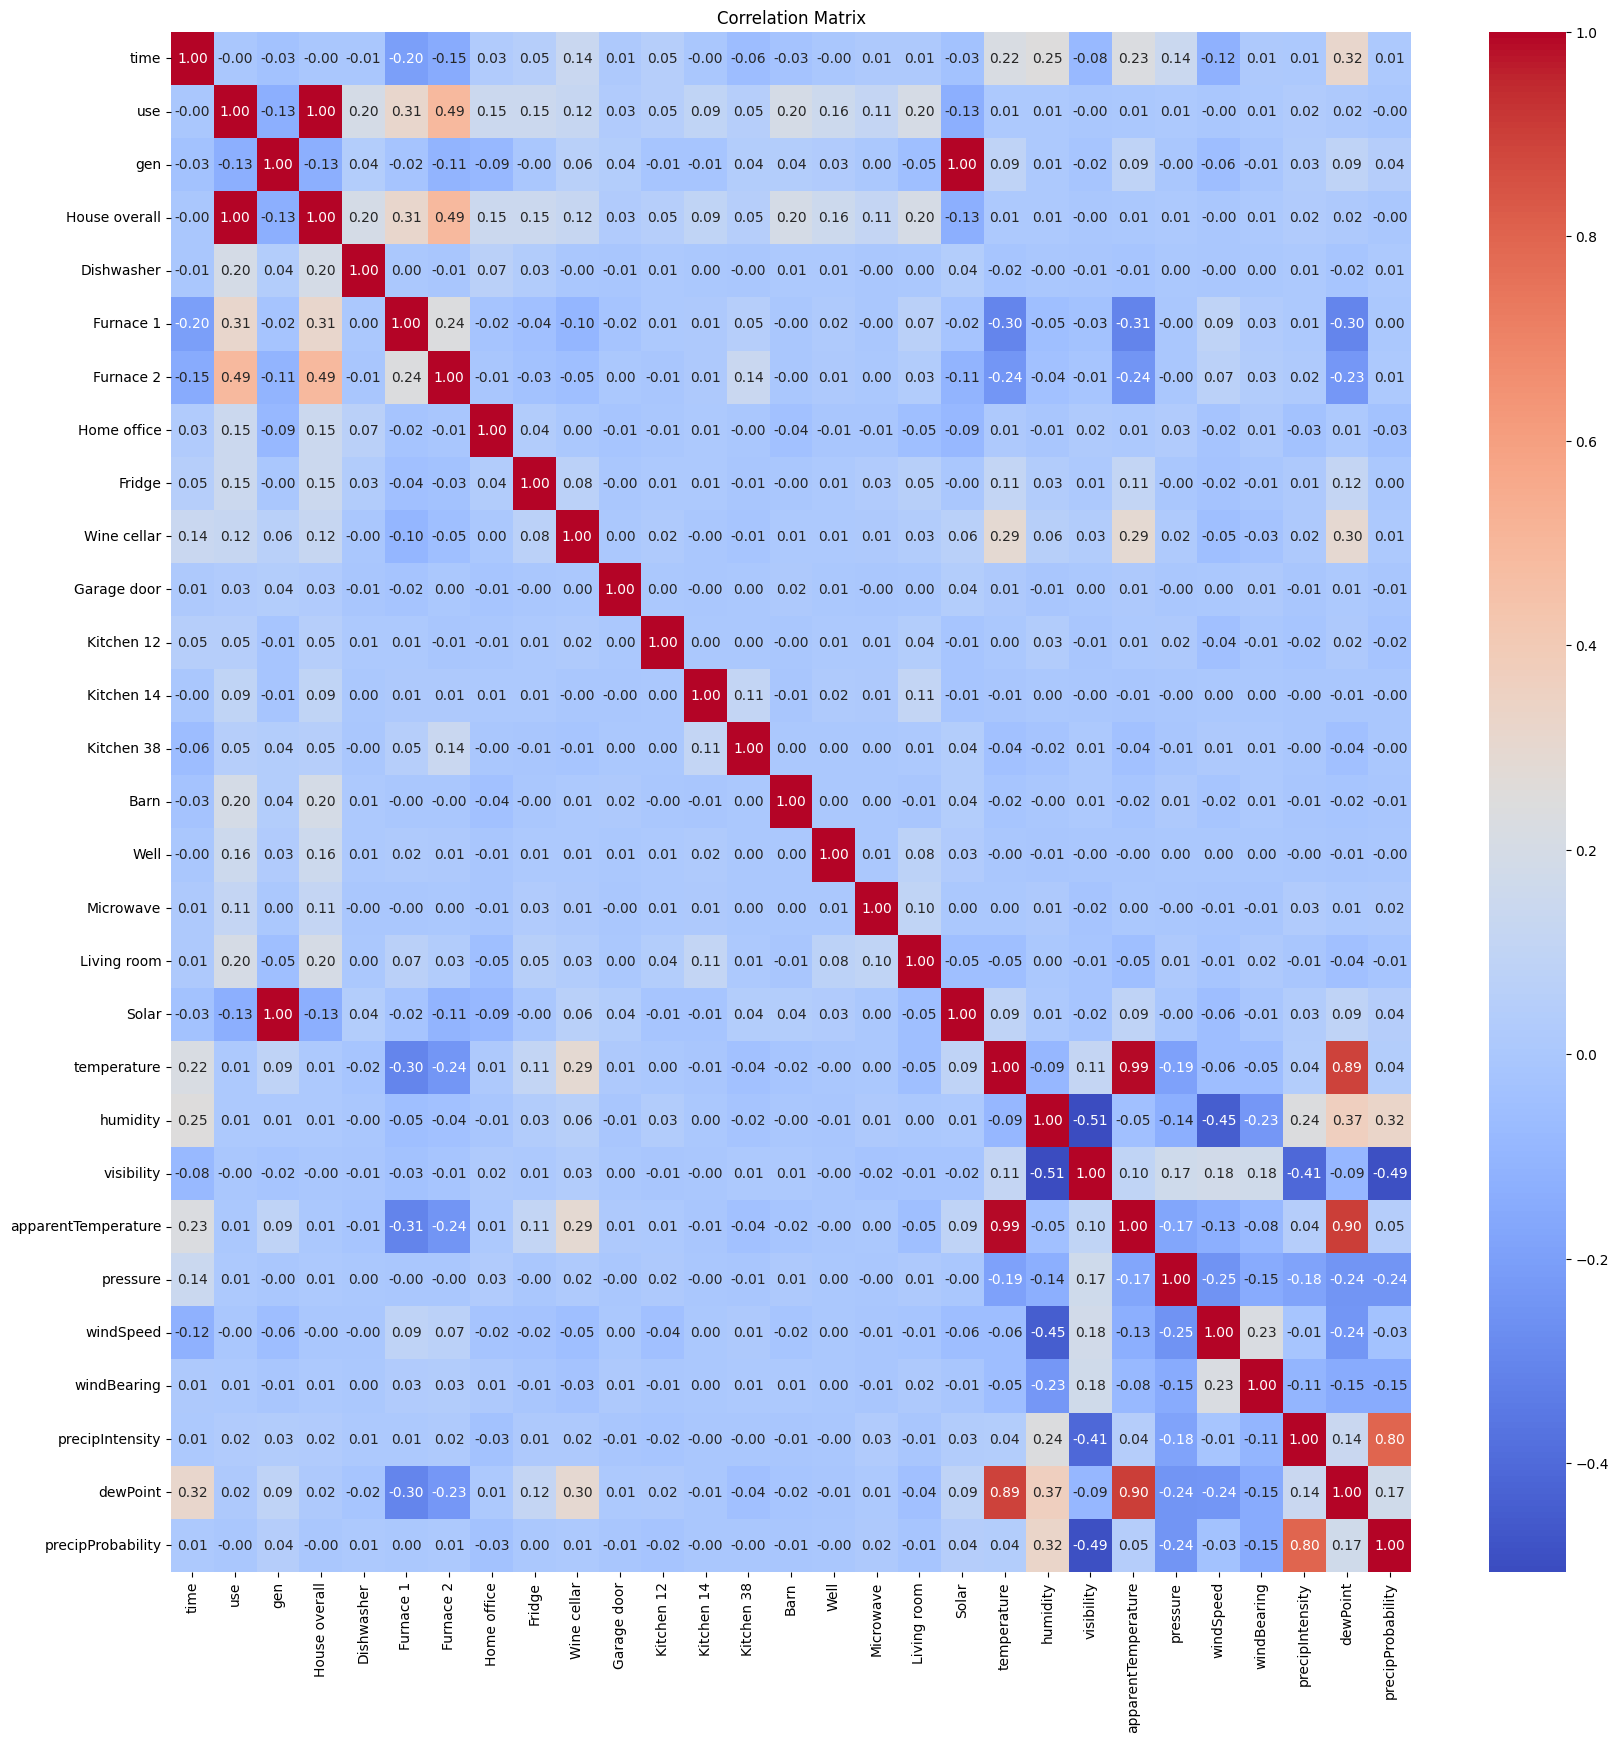

In [ ]:
# Visualize database correlation
import seaborn as sns
import matplotlib.pyplot as plt

non_cat_columns = [col for col in df_tmp.columns if col not in cat_attr]
non_cat_df = df_tmp[non_cat_columns]
correlation_matrix = non_cat_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# House overall and use are the same columns, gen and solar are the same as well.
df_tmp.drop("House overall",axis=1,inplace=True)
df_tmp.drop("Solar",axis=1,inplace=True)

In [ ]:
# We are not going to use icon,summary
df_tmp.drop("summary",axis=1,inplace=True)
df_tmp.drop("icon",axis=1,inplace=True)
cat_attr.remove("summary")
cat_attr.remove("icon")
df_tmp.columns

Index(['time', 'use', 'gen', 'Dishwasher', 'Furnace 1', 'Furnace 2',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room',
       'temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [ ]:
# Display unique values in the 'cloudCover' column
unique_values_cloud_cover = df_tmp['cloudCover'].unique()
# Replace non-numeric values with NaN (then 1) and then convert to float
df_tmp['cloudCover'] = pd.to_numeric(df_tmp['cloudCover'], errors='coerce').fillna(1)
cat_attr.remove("cloudCover")
df_tmp['cloudCover']

0         1.00
1         1.00
2         1.00
3         1.00
4         1.00
          ... 
503905    0.31
503906    0.31
503907    0.31
503908    0.31
503909    0.31
Name: cloudCover, Length: 503910, dtype: float64

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 503910 non-null  datetime64[ns]
 1   use                  503910 non-null  float64       
 2   gen                  503910 non-null  float64       
 3   Dishwasher           503910 non-null  float64       
 4   Furnace 1            503910 non-null  float64       
 5   Furnace 2            503910 non-null  float64       
 6   Home office          503910 non-null  float64       
 7   Fridge               503910 non-null  float64       
 8   Wine cellar          503910 non-null  float64       
 9   Garage door          503910 non-null  float64       
 10  Kitchen 12           503910 non-null  float64       
 11  Kitchen 14           503910 non-null  float64       
 12  Kitchen 38           503910 non-null  float64       
 13  Barn          

In [ ]:
# Check None Values
df_tmp.isna().sum()

time                   0
use                    0
gen                    0
Dishwasher             0
Furnace 1              0
Furnace 2              0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Kitchen 12             0
Kitchen 14             0
Kitchen 38             0
Barn                   0
Well                   0
Microwave              0
Living room            0
temperature            0
humidity               0
visibility             0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [ ]:
# Export current tmp dataframe
df_tmp.to_csv("data/HomeC_exported.csv", index=True)

In [ ]:
# Import data
df_tmp = pd.read_csv("data/HomeC_exported.csv",
                     low_memory=False)
df_tmp.head().T

0                    1  \
Unnamed: 0                             0                    1   
time                 2016-01-01 05:00:00  2016-01-01 05:01:00   
use                             0.932833             0.934333   
gen                             0.003483             0.003467   
Dishwasher                      0.000033                  0.0   
Furnace 1                         0.0207             0.020717   
Furnace 2                       0.061917             0.063817   
Home office                     0.442633             0.444067   
Fridge                           0.12415                0.124   
Wine cellar                     0.006983             0.006983   
Garage door                     0.013083             0.013117   
Kitchen 12                      0.000417             0.000417   
Kitchen 14                       0.00015              0.00015   
Kitchen 38                           0.0                  0.0   
Barn                             0.03135               0.0315   
Well                            0.001017             0.001017   
Microwave                       0.004067             0.004067   
Living room                     0.001517              0.00165   
temperature                        36.14                36.14   
humidity                            0.62                 0.62   
visibility                          10.0                 10.0   
apparentTemperature                29.26                29.26   
pressure                         1016.91              1016.91   
windSpeed                           9.18                 9.18   
cloudCover                           1.0                  1.0   
windBearing                        282.0                282.0   
precipIntensity                      0.0                  0.0   
dewPoint                            24.4                 24.4   
precipProbability                    0.0                  0.0   

                                       2                    3  \
Unnamed: 0                             2                    3   
time                 2016-01-01 05:02:00  2016-01-01 05:03:00   
use                             0.931817              1.02205   
gen                             0.003467             0.003483   
Dishwasher                      0.000017             0.000017   
Furnace 1                         0.0207               0.1069   
Furnace 2                       0.062317             0.068517   
Home office                     0.446067             0.446583   
Fridge                          0.123533             0.123133   
Wine cellar                     0.006983             0.006983   
Garage door                     0.013083                0.013   
Kitchen 12                      0.000433             0.000433   
Kitchen 14                      0.000167             0.000217   
Kitchen 38                      0.000017                  0.0   
Barn                            0.031517               0.0315   
Well                               0.001             0.001017   
Microwave                       0.004067             0.004067   
Living room                      0.00165             0.001617   
temperature                        36.14                36.14   
humidity                            0.62                 0.62   
visibility                          10.0                 10.0   
apparentTemperature                29.26                29.26   
pressure                         1016.91              1016.91   
windSpeed                           9.18                 9.18   
cloudCover                           1.0                  1.0   
windBearing                        282.0                282.0   
precipIntensity                      0.0                  0.0   
dewPoint                            24.4                 24.4   
precipProbability                    0.0                  0.0   

                                       4  
Unnamed: 0                             4  
time                 2016-01-01 05:04:00  
use     

In [ ]:
# Create new Columns to represent time in order to make more accessable
df_tmp["time"] = pd.to_datetime(df_tmp["time"])
df_tmp["usageYear"] = df_tmp["time"].dt.year
df_tmp["usageMonth"] = df_tmp["time"].dt.month
df_tmp["usageDayOfWeek"] = df_tmp["time"].dt.dayofweek
df_tmp["usageDayOfYear"] = df_tmp["time"].dt.dayofyear
df_tmp["usageHour"] = df_tmp["time"].dt.hour
df_tmp["usageMinute"] = df_tmp["time"].dt.minute
df_tmp.drop("time",axis=1,inplace=True)

In [ ]:
# Set index according to time
df_tmp = df_tmp.set_index(time_index)
df_tmp.head().T

2016-01-01 05:00:00  2016-01-01 05:01:00  \
Unnamed: 0                      0.000000             1.000000   
use                             0.932833             0.934333   
gen                             0.003483             0.003467   
Dishwasher                      0.000033             0.000000   
Furnace 1                       0.020700             0.020717   
Furnace 2                       0.061917             0.063817   
Home office                     0.442633             0.444067   
Fridge                          0.124150             0.124000   
Wine cellar                     0.006983             0.006983   
Garage door                     0.013083             0.013117   
Kitchen 12                      0.000417             0.000417   
Kitchen 14                      0.000150             0.000150   
Kitchen 38                      0.000000             0.000000   
Barn                            0.031350             0.031500   
Well                            0.001017             0.001017   
Microwave                       0.004067             0.004067   
Living room                     0.001517             0.001650   
temperature                    36.140000            36.140000   
humidity                        0.620000             0.620000   
visibility                     10.000000            10.000000   
apparentTemperature            29.260000            29.260000   
pressure                     1016.910000          1016.910000   
windSpeed                       9.180000             9.180000   
cloudCover                      1.000000             1.000000   
windBearing                   282.000000           282.000000   
precipIntensity                 0.000000             0.000000   
dewPoint                       24.400000            24.400000   
precipProbability               0.000000             0.000000   
usageYear                    2016.000000          2016.000000   
usageMonth                      1.000000             1.000000   
usageDayOfWeek                  4.000000             4.000000   
usageDayOfYear                  1.000000             1.000000   
usageHour                       5.000000             5.000000   
usageMinute                     0.000000             1.000000   

                     2016-01-01 05:02:00  2016-01-01 05:03:00  \
Unnamed: 0                      2.000000             3.000000   
use                             0.931817             1.022050   
gen                             0.003467             0.003483   
Dishwasher                      0.000017             0.000017   
Furnace 1                       0.020700             0.106900   
Furnace 2                       0.062317             0.068517   
Home office                     0.446067             0.446583   
Fridge                          0.123533             0.123133   
Wine cellar                     0.006983             0.006983   
Garage door                     0.013083             0.013000   
Kitchen 12                      0.000433             0.000433   
Kitchen 14                      0.000167             0.000217   
Kitchen 38                      0.000017             0.000000   
Barn                            0.031517             0.031500   
Well                            0.001000             0.001017   
Microwave                       0.004067             0.004067   
Living room                     0.001650             0.001617   
temperature                    36.140000            36.140000   
humidity                        0.620000             0.620000   
visibility                     10.000000            10.000000   
apparentTemperature            29.260000            29.260000   
pressure                     1016.910000          1016.910000   
windSpeed                       9.180000             9.180000   
cloudCover                      1.000000             1.000000   
windBearing                   282.000000           282.000000   
precipIntensity                 0.000000             0.

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           503910 non-null  int64  
 1   use                  503910 non-null  float64
 2   gen                  503910 non-null  float64
 3   Dishwasher           503910 non-null  float64
 4   Furnace 1            503910 non-null  float64
 5   Furnace 2            503910 non-null  float64
 6   Home office          503910 non-null  float64
 7   Fridge               503910 non-null  float64
 8   Wine cellar          503910 non-null  float64
 9   Garage door          503910 non-null  float64
 10  Kitchen 12           503910 non-null  float64
 11  Kitchen 14           503910 non-null  float64
 12  Kitchen 38           503910 non-null  float64
 13  Barn                 503910 non-null  float64
 14  Well                 50391

# Visualize Data

> Now everything is numerical. From now on, for the sake of simplicity, let's only work on `hourly` dataset.

In [ ]:
df_tmp = df_tmp.resample('H').mean()

In [ ]:
# Assing default figure size
plt.rcParams["figure.figsize"] = (25,5)

### Useage Visualization

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Usage (kW) in (02)(03)-Jan')]

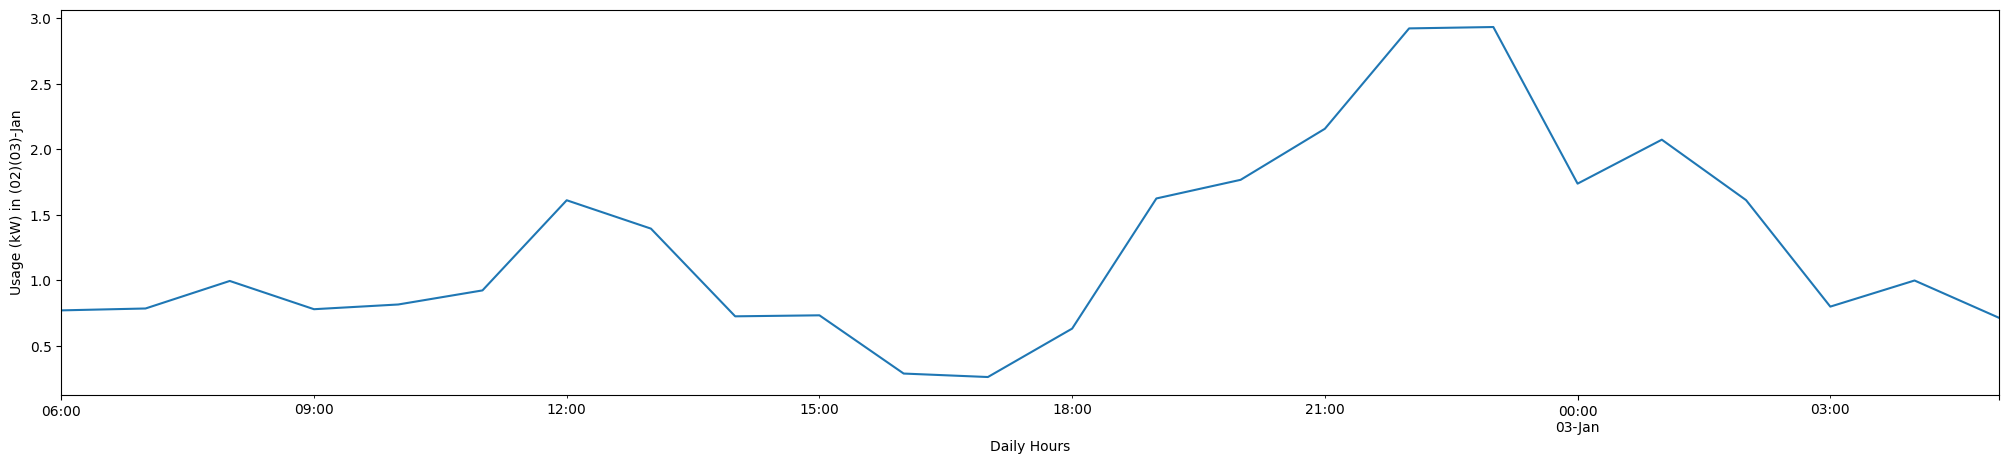

In [ ]:
df_tmp['use'].resample("h").mean().iloc[25:49].plot().set(xlabel='Daily Hours', ylabel='Usage (kW) in (02)(03)-Jan')

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Usage (kW)')]

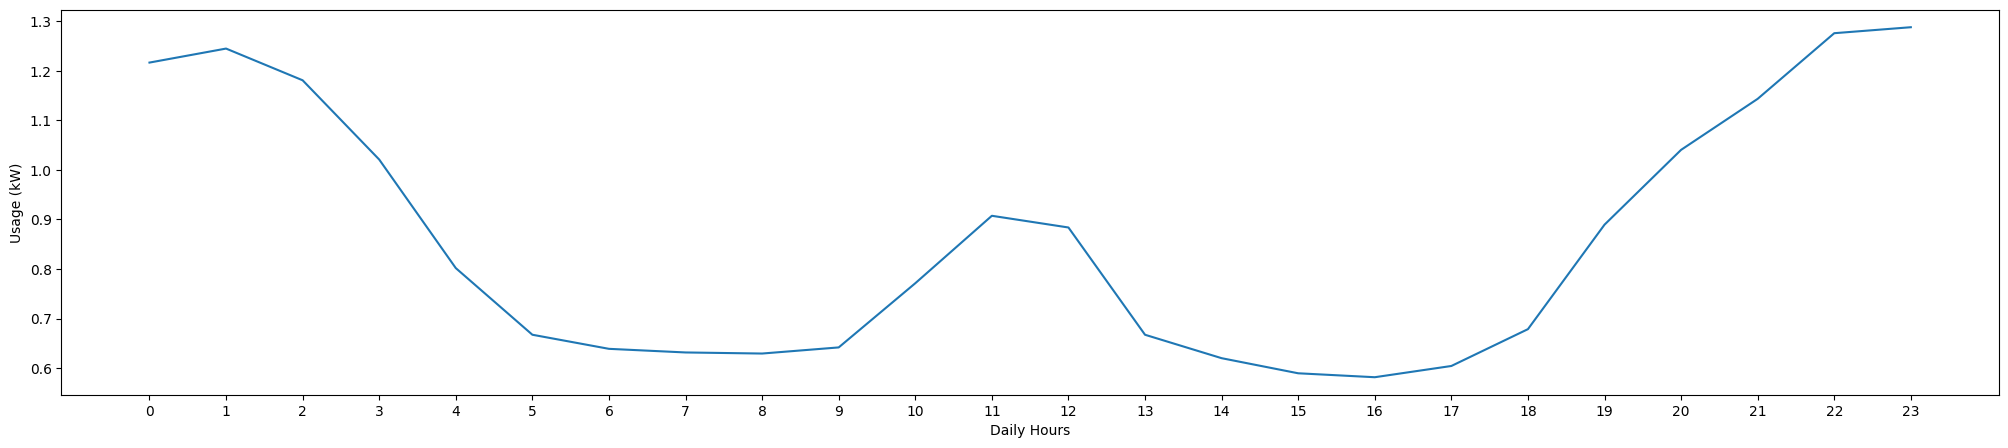

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()['use'].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Usage (kW)')

### Generated Energy Visualization

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Generated E.(kW)')]

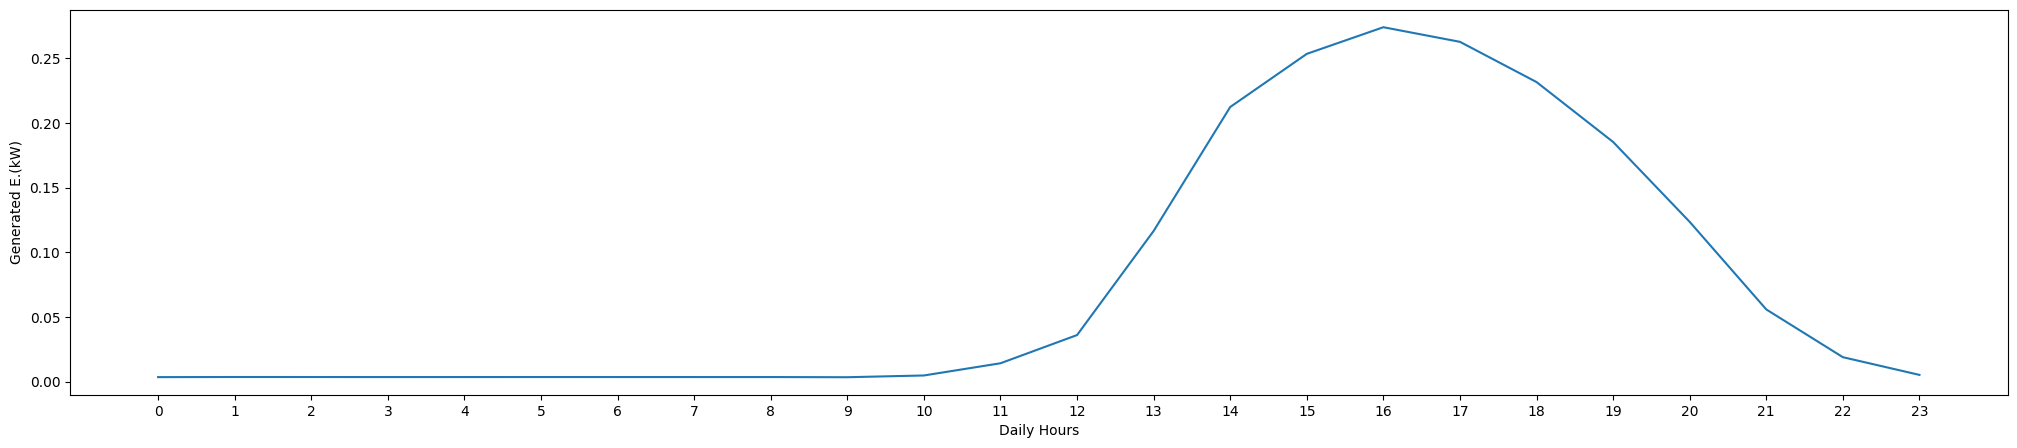

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()['gen'].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Generated E.(kW)')

### Dishwasher Energy Visualization

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Usage E.(kW)')]

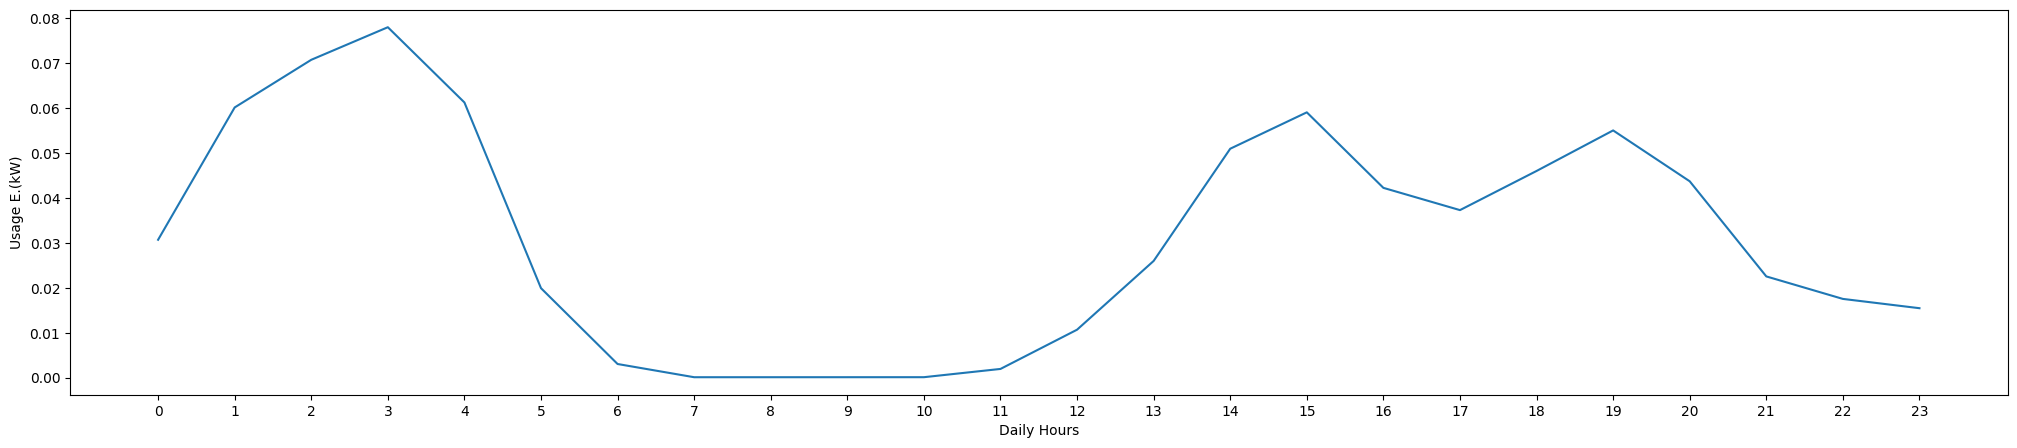

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()['Dishwasher'].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Usage E.(kW)')

### Furnace 1 Energy Visualization

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Usage E.(kW)')]

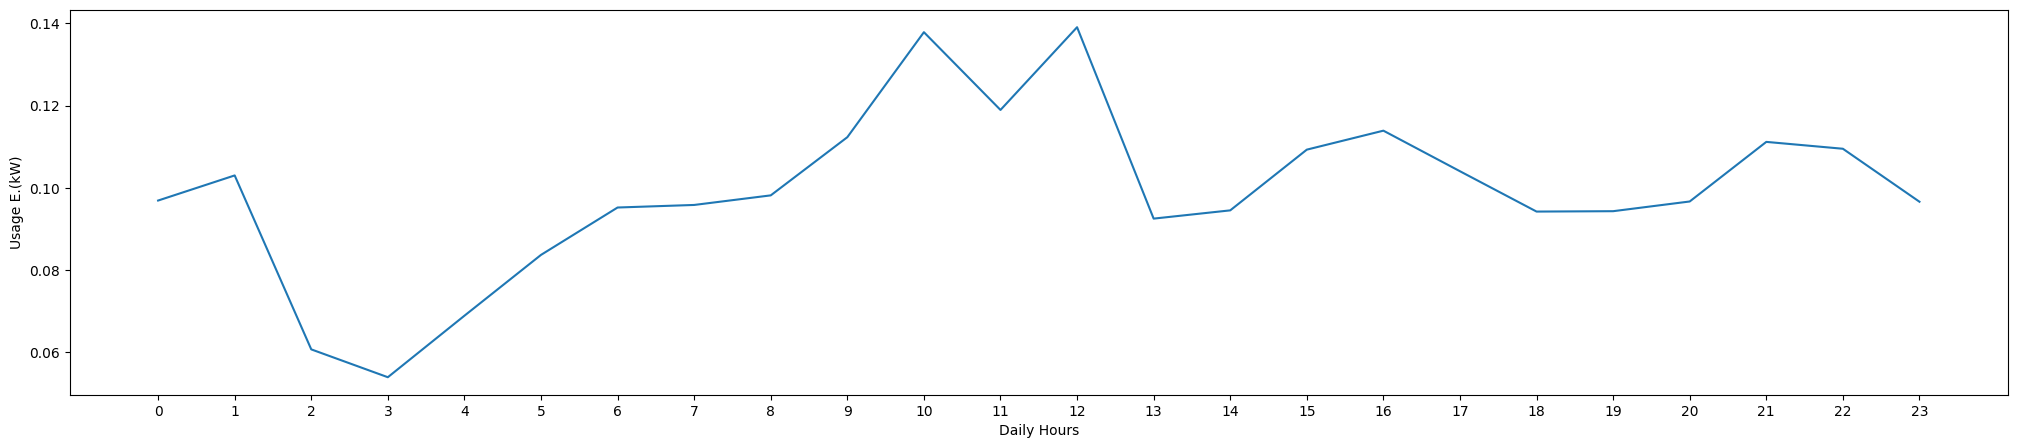

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()['Furnace 1'].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Usage E.(kW)')

### Furnace 2 Energy Visualization

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Usage E.(kW)')]

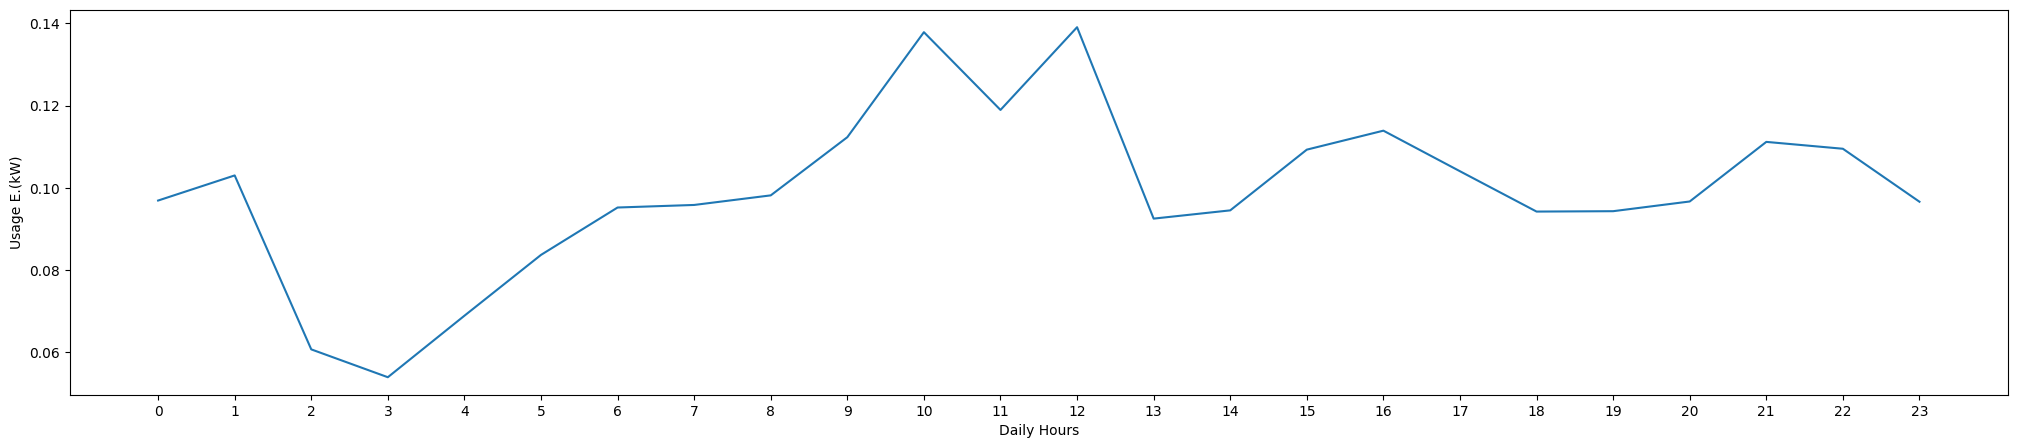

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()['Furnace 1'].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Usage E.(kW)')

# Moving Averages

### Simple Moving Average (SMA):

SMA calculates the simple average of prices or data within a specific period. In its computation, each data point holds equal weight, contributing equally to the average over a defined time frame. SMA is used to indicate the general trend of prices or data within a certain period. However, SMA lacks flexibility and might lag in capturing trend changes due to giving equal weight to all data points, regardless of recency. After designing smart home systems, it can be used to view the flow of the data.

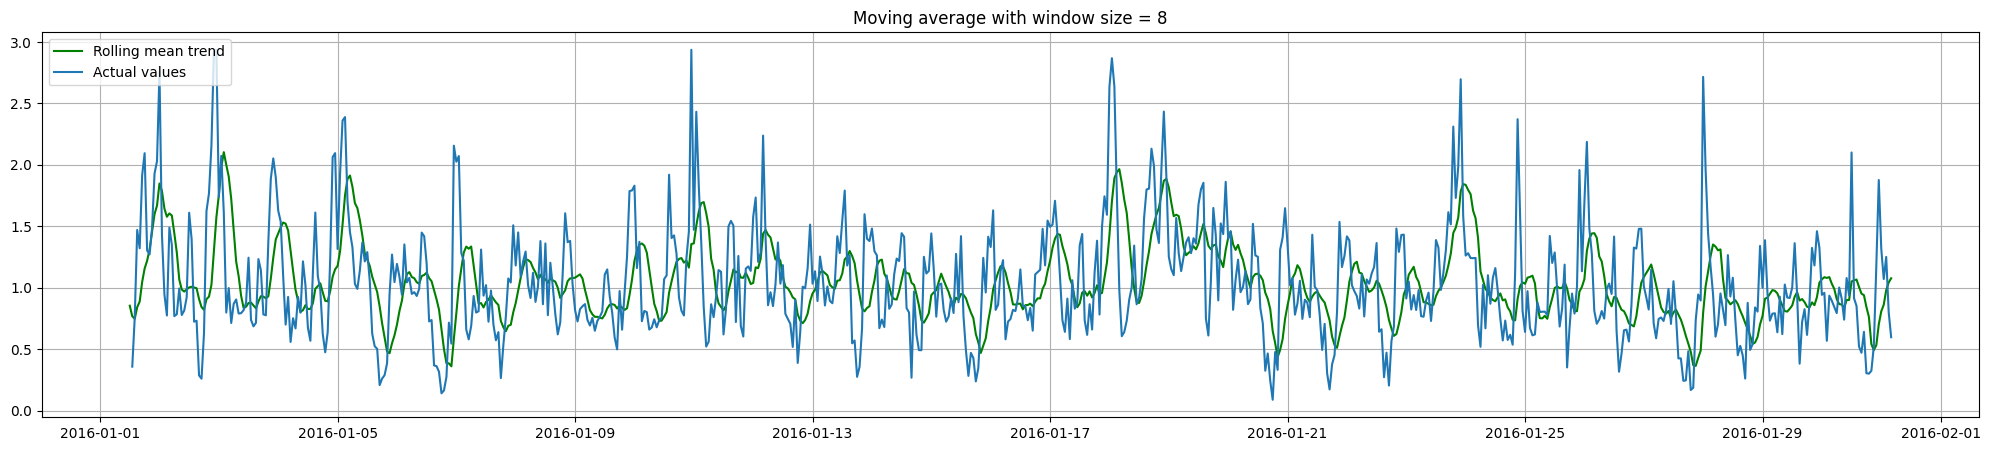

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies
    """

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(25,5))
    plt.title("Moving average with window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

n_samples = 24*30 # 1 month
cols = ['use']
plotMovingAverage(df_tmp[cols][:n_samples], window=8) # A window of 6 hours

### Anomaly Detection

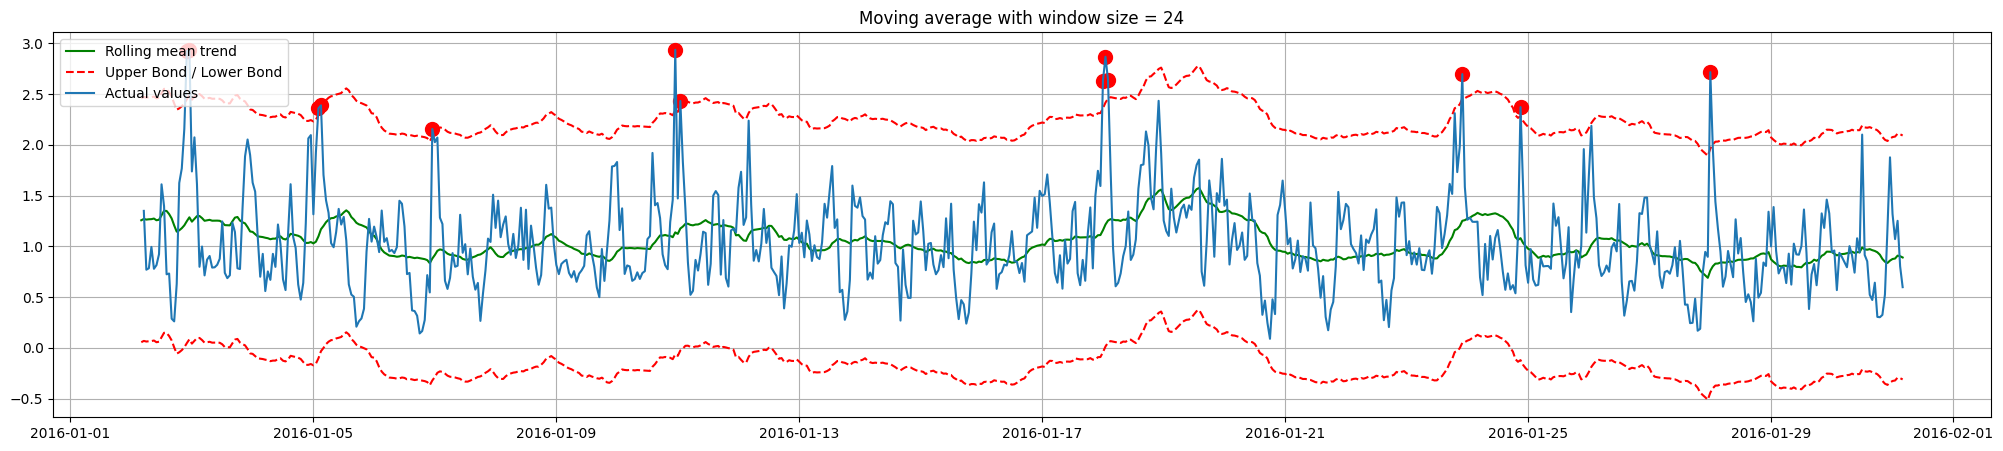

In [ ]:
plotMovingAverage(df_tmp[cols][:n_samples], window=24, plot_intervals=True, plot_anomalies=True)

### Exponential Moving Average (EMA):

EMA, on the other hand, gives more weight to recent data points compared to older ones. It responds more sensitively to price or data changes, as it applies exponentially decreasing weights to past observations. EMA provides a faster response to market fluctuations and changes in trends compared to SMA. This increased responsiveness makes EMA more preferred in certain trading strategies and technical analysis, particularly when traders seek quicker trend indications and want to react promptly to market shifts. It can be used to regulate the flow of data in the latest trend while developing smart home systems.

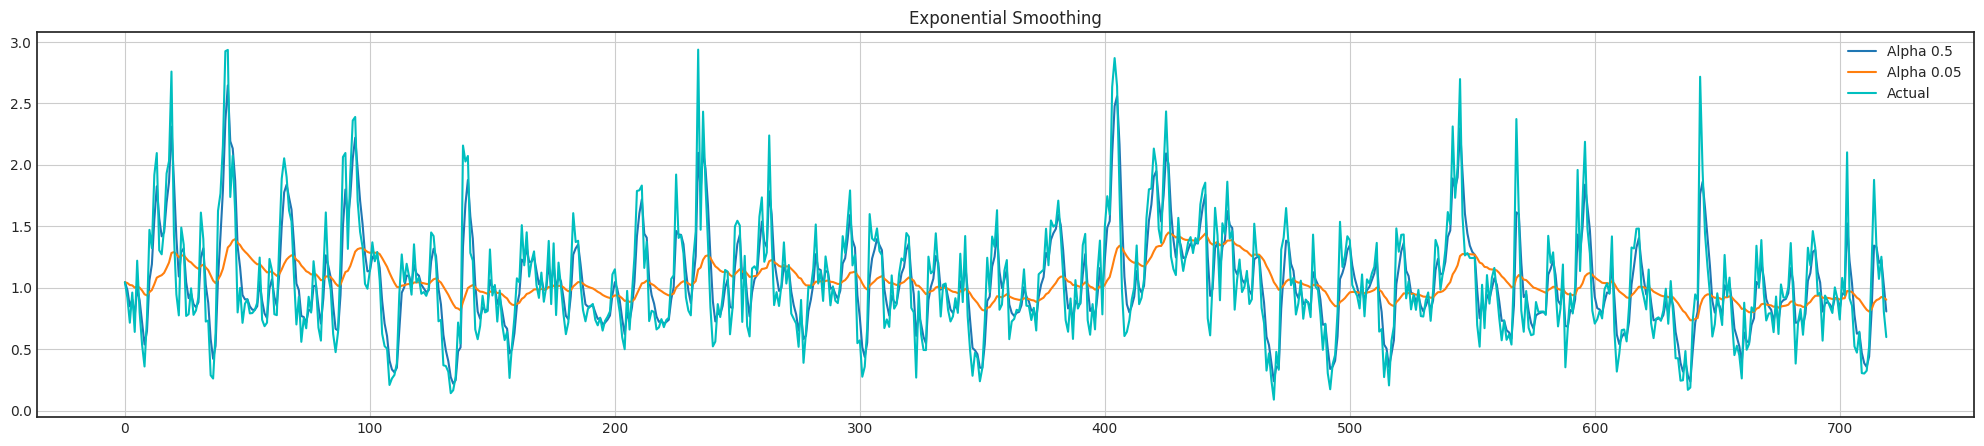

In [ ]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas

        series - dataset with timestamps
        alphas - list of floats, smoothing parameters

    """
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(25, 5))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);
n_samples = 24*30 # 1 month
col = 'use'
plotExponentialSmoothing(df_tmp[col][:n_samples], [0.5, 0.05])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
keras.__version__

'2.15.0'

In [ ]:
df_tmp.columns

Index(['Unnamed: 0', 'use', 'gen', 'Dishwasher', 'Furnace 1', 'Furnace 2',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room',
       'temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'usageYear', 'usageMonth',
       'usageDayOfWeek', 'usageDayOfYear', 'usageHour', 'usageMinute'],
      dtype='object')

In [ ]:
training_features = df_tmp[['gen', 'Dishwasher', 'Furnace 1', 'Furnace 2',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room']]
energy_use = df_tmp['use']
training_features = training_features['2016-01-02 05:00:00':'2016-12-02 05:00:00']
training_features['yesterday_use'] = energy_use['2016-01-01 05:00:00':'2016-12-01 05:00:00'].values
energy_use = df_tmp['use']['2016-01-02 05:00:00':'2016-12-02 05:00:00']
training_features.shape, energy_use.shape

((8041, 16), (8041,))

In [ ]:
total_data_length = len(training_features)
train_end = int(total_data_length * 0.7)+1
val_end = int(total_data_length * 0.85)+1
x_train = training_features[:train_end]
y_train = energy_use[:train_end]
x_val = training_features[train_end:val_end]
y_val = energy_use[train_end:val_end]
x_test = training_features[val_end:]
y_test = energy_use[val_end:]
x_train.shape, y_train.shape,x_val.shape, y_val.shape, x_test.shape, y_test.shape

((5629, 16), (5629,), (1206, 16), (1206,), (1206, 16), (1206,))

In [ ]:
y_test[10]

0.35027499998333333

### Calculate cost of energy usage
According to this link :  https://www.gotrhythm.com/blog/electricity-101/what-are-tiered-rate-energy-plans, calculation cost funtion (hourly) must be like this:

In [ ]:
def calculateCost(list1):
    total = 0
    for i in range (len(list1)):
        if list1[i] <= 0.694:
            total +=list1[i] *0.149
        if 0.694 <list1[i] <= 1.389:
            total +=list1[i] *0.105
        if 1.389<list1[i] <= 2.778:
            total +=list1[i]* 0.132
    return  total

result_first=calculateCost(y_test)
result_first

113.81170581221429

## Time-Series Prediction with Recurrent Neural Networks
Here we want to use current consumption information for predicting the energy usage.

In [ ]:
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=32))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 12705 (49.63 KB)
Trainable params: 12705 (49.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=16, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/16

176/176 [==============================] - 9s 25ms/step - loss: 0.6185 - val_loss: 0.4364
Epoch 2/16
176/176 [==============================] - 3s 17ms/step - loss: 0.4073 - val_loss: 0.4520
Epoch 3/16
176/176 [==============================] - 3s 17ms/step - loss: 0.3838 - val_loss: 0.4190
Epoch 4/16
176/176 [==============================] - 3s 17ms/step - loss: 0.3637 - val_loss: 0.3887
Epoch 5/16
176/176 [==============================] - 3s 17ms/step - loss: 0.3455 - val_loss: 0.3788
Epoch 6/16
176/176 [==============================] - 3s 16ms/step - loss: 0.3494 - val_loss: 0.3557
Epoch 7/16
176/176 [==============================] - 3s 16ms/step - loss: 0.3310 - val_loss: 0.3692
Epoch 8/16
176/176 [==============================] - 3s 16ms/step - loss: 0.3363 - val_loss: 0.3985
Epoch 9/16
176/176 [==============================] - 3s 16ms/step - loss: 0.3315 - val_loss: 0.3759
Epoch 10/16
176/176 [==============================] - 3s 16ms/step - loss: 0.3248 - val_l

38/38 [==============================] - 1s 5ms/step


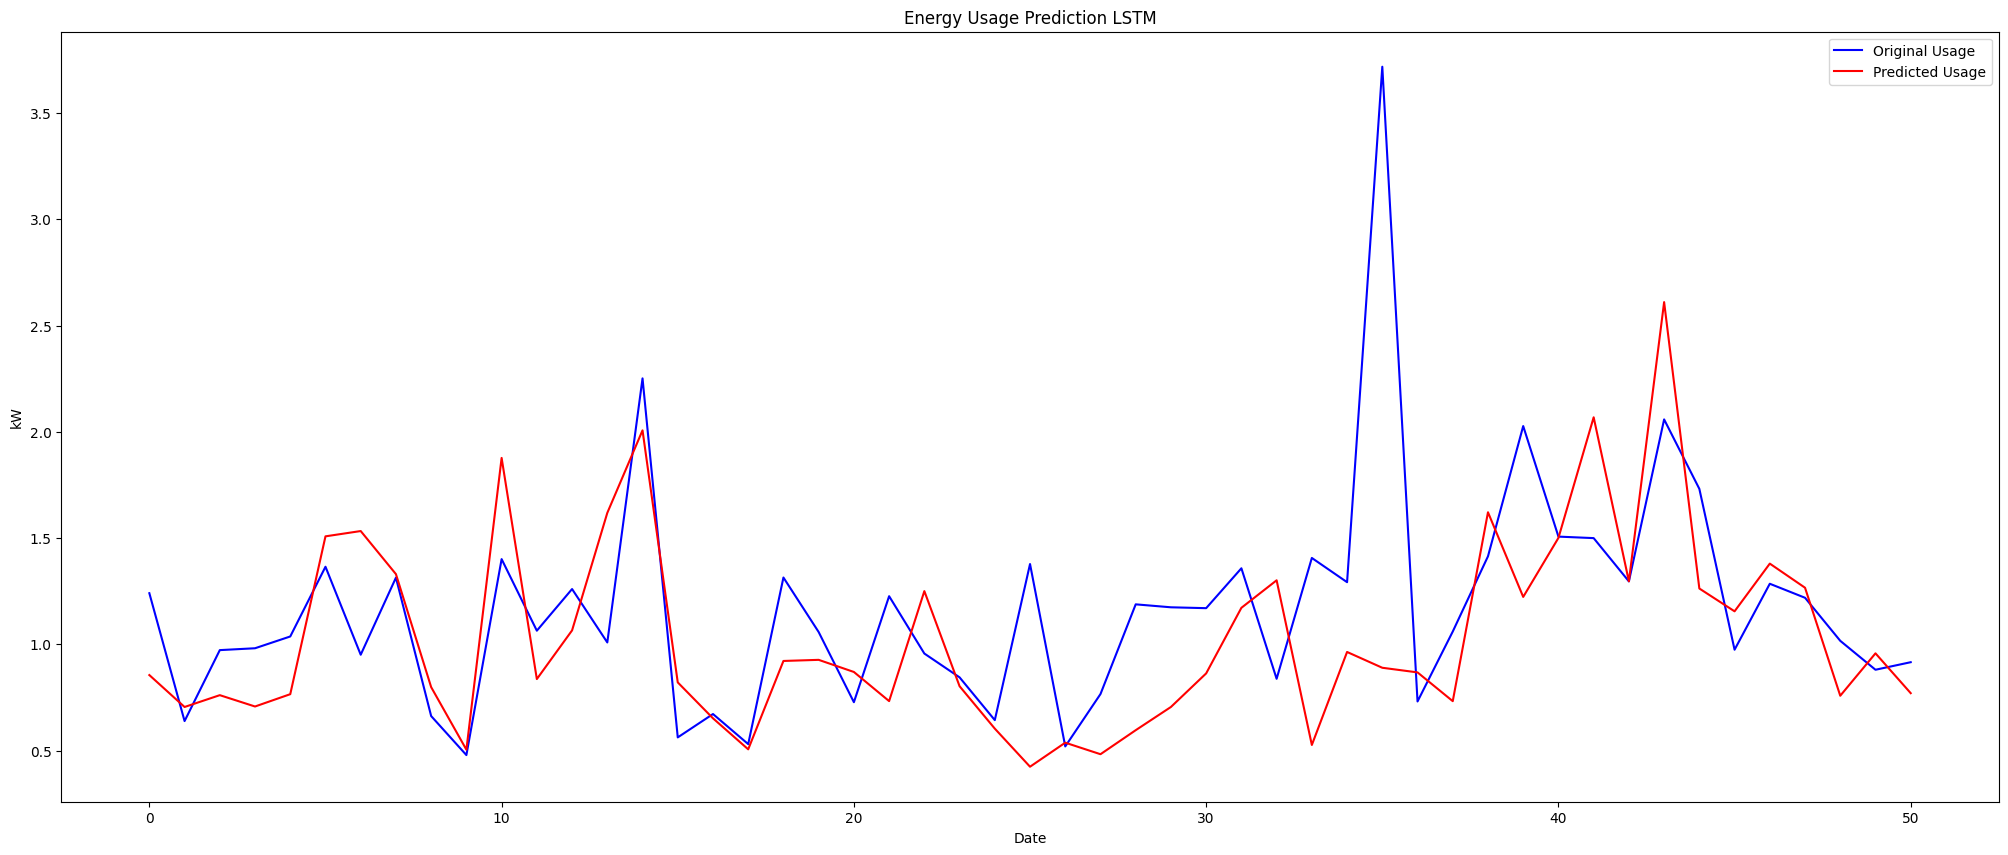

In [ ]:
predictions = model.predict(x_test)
def plotPrediction(predictions,model):
    plt.figure(figsize=(25,10))
    plt.plot(y_test.values[::24], color='blue', label='Original Usage')
    plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
    plt.title('Energy Usage Prediction '+model)
    plt.xlabel('Date')
    plt.ylabel('kW')
    plt.legend()
    plt.show()
plotPrediction(predictions,"LSTM")

In [ ]:
predict_df = pd.DataFrame(predictions, columns=['use'])

selected_range_start = val_end
selected_range_end = total_data_length
print(selected_range_start,selected_range_end)
selected_range = df_tmp.iloc[selected_range_start:selected_range_end]

predict_df.index = selected_range.index

6835 8041


### Observe Average Moving According to Prediction

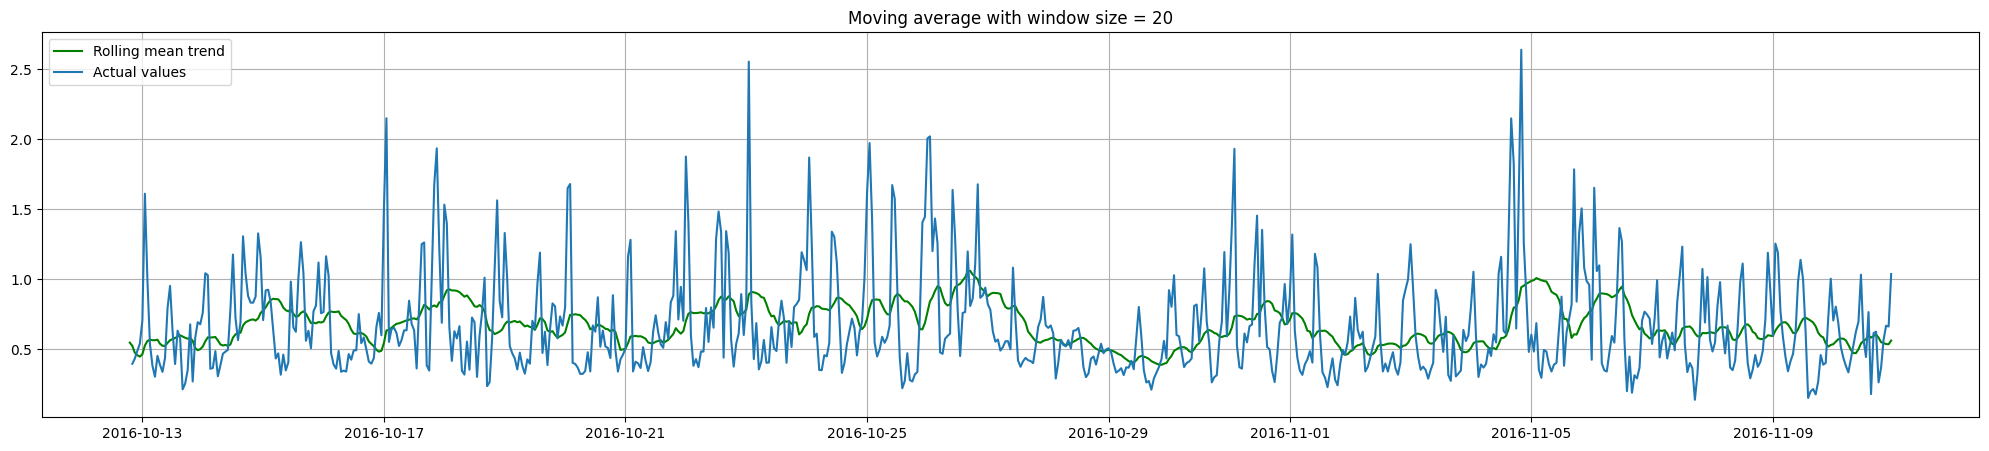

In [ ]:
plotMovingAverage(predict_df[col][:n_samples],window=20)

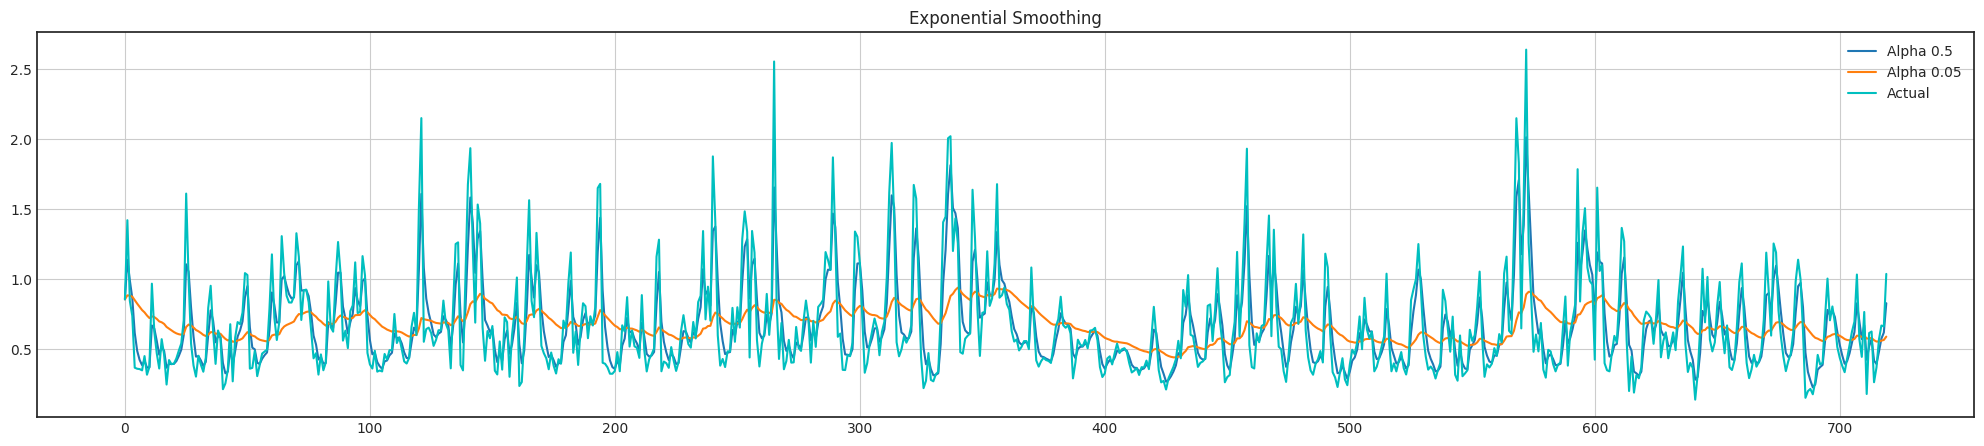

In [ ]:
plotExponentialSmoothing(predict_df[col][:n_samples], [0.5, 0.05])

### Grade Model Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def rmsle(y_test,y_preds):
    """
    Calculates root mean squared log error between predictions and
    true labels.
    """
    if mean_squared_log_error(y_test,y_preds)>0:
        return np.sqrt(mean_squared_log_error(y_test,y_preds))
    else :
        return 0

# Create function to evaluate model on few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    scores = {"Traning MAE":mean_absolute_error(y_train,train_preds),
              "Training RMSLE": rmsle(y_train,train_preds),
              "Training R^2": r2_score(y_train,train_preds),
              "Training MSE": mean_squared_error(y_train,train_preds),
              "Validation MAE":mean_absolute_error(y_val,val_preds),
              "Validation RMSLE": rmsle(y_val,val_preds),
              "Validation R^2": r2_score(y_val,val_preds),
              "Validation MSE": mean_squared_error(y_val,val_preds),
              }
    return  scores
show_scores(model)

38/38 [==============================] - 0s 5ms/step


{'Traning MAE': 0.2716221424503917,
 'Training RMSLE': 0.18038976596572864,
 'Training R^2': 0.5991890590951566,
 'Training MSE': 0.30469427694558876,
 'Validation MAE': 0.24213750511619084,
 'Validation RMSLE': 0.17989602045240285,
 'Validation R^2': 0.5159744681193285,
 'Validation MSE': 0.3219708798883457}

38/38 [==============================] - 0s 5ms/step


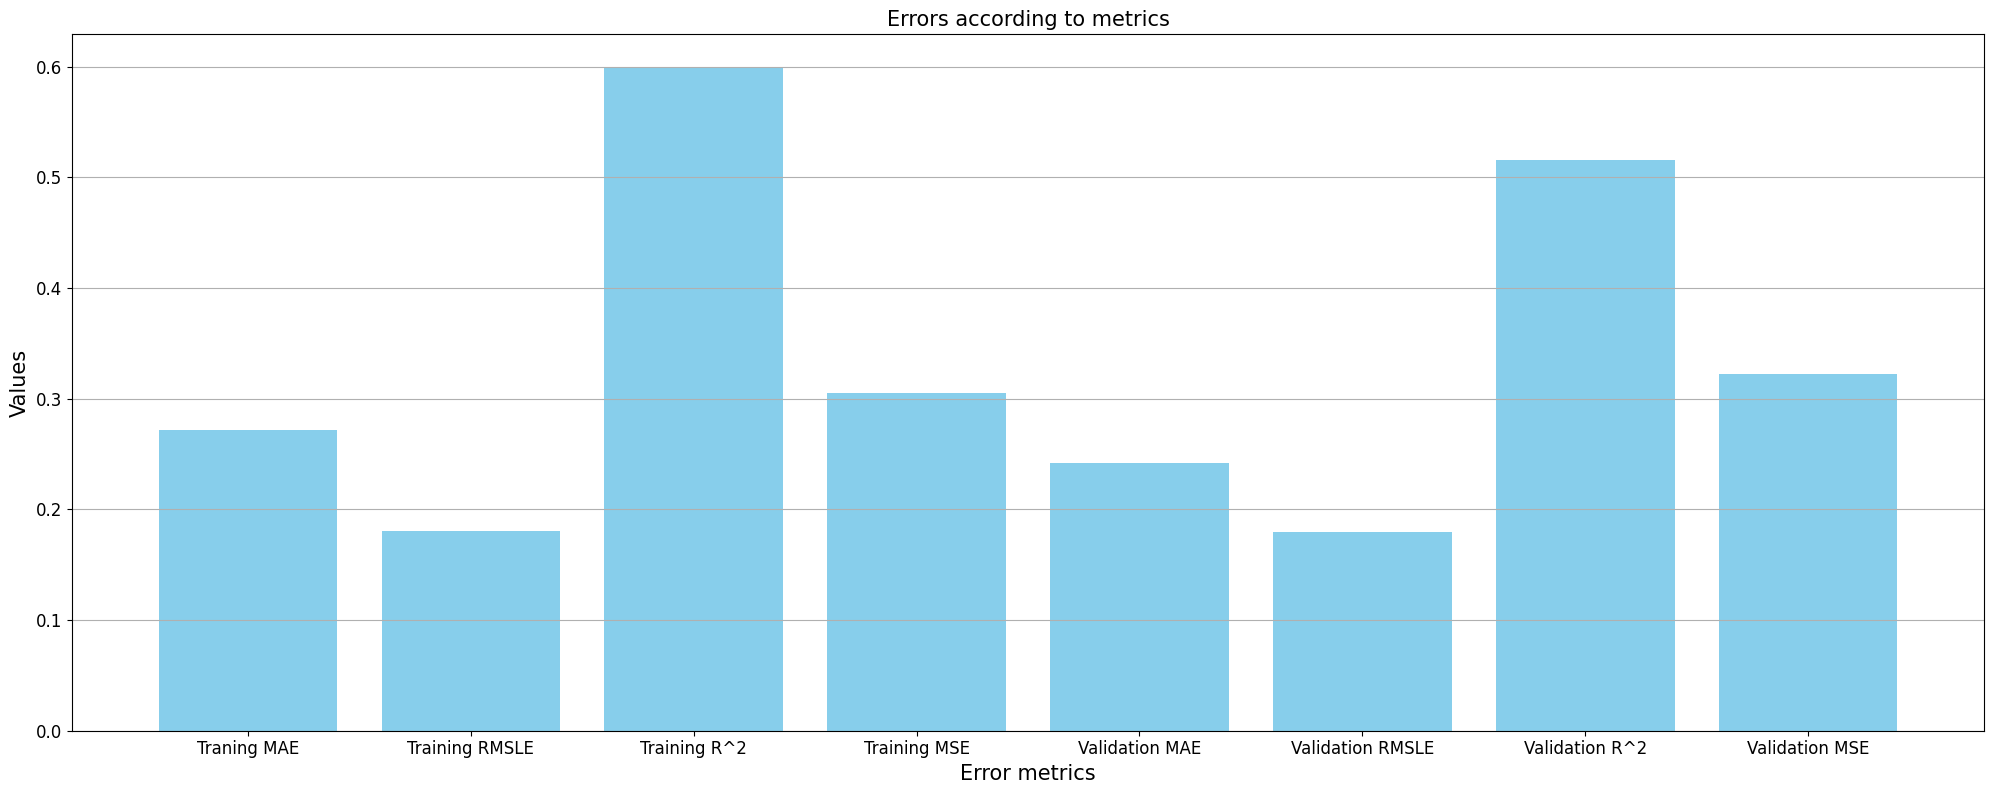

In [ ]:
def plotScore(model):
    plt.figure(figsize=(20, 8))
    plt.bar(list(show_scores(model).keys()), list(show_scores(model).values()), color='skyblue')
    plt.title('Errors according to metrics',fontsize=15)
    plt.xlabel('Error metrics',fontsize=15)
    plt.ylabel('Values',fontsize=15)
    plt.tight_layout()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y')
    plt.show()
plotScore(model)

## Time-Series Prediction with Random Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions =rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

#Fit the RandomizedSearchCV model
rs_model.fit(x_train.values.reshape(-1, x_train.values.shape[1]), y_train.values)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=True)

c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


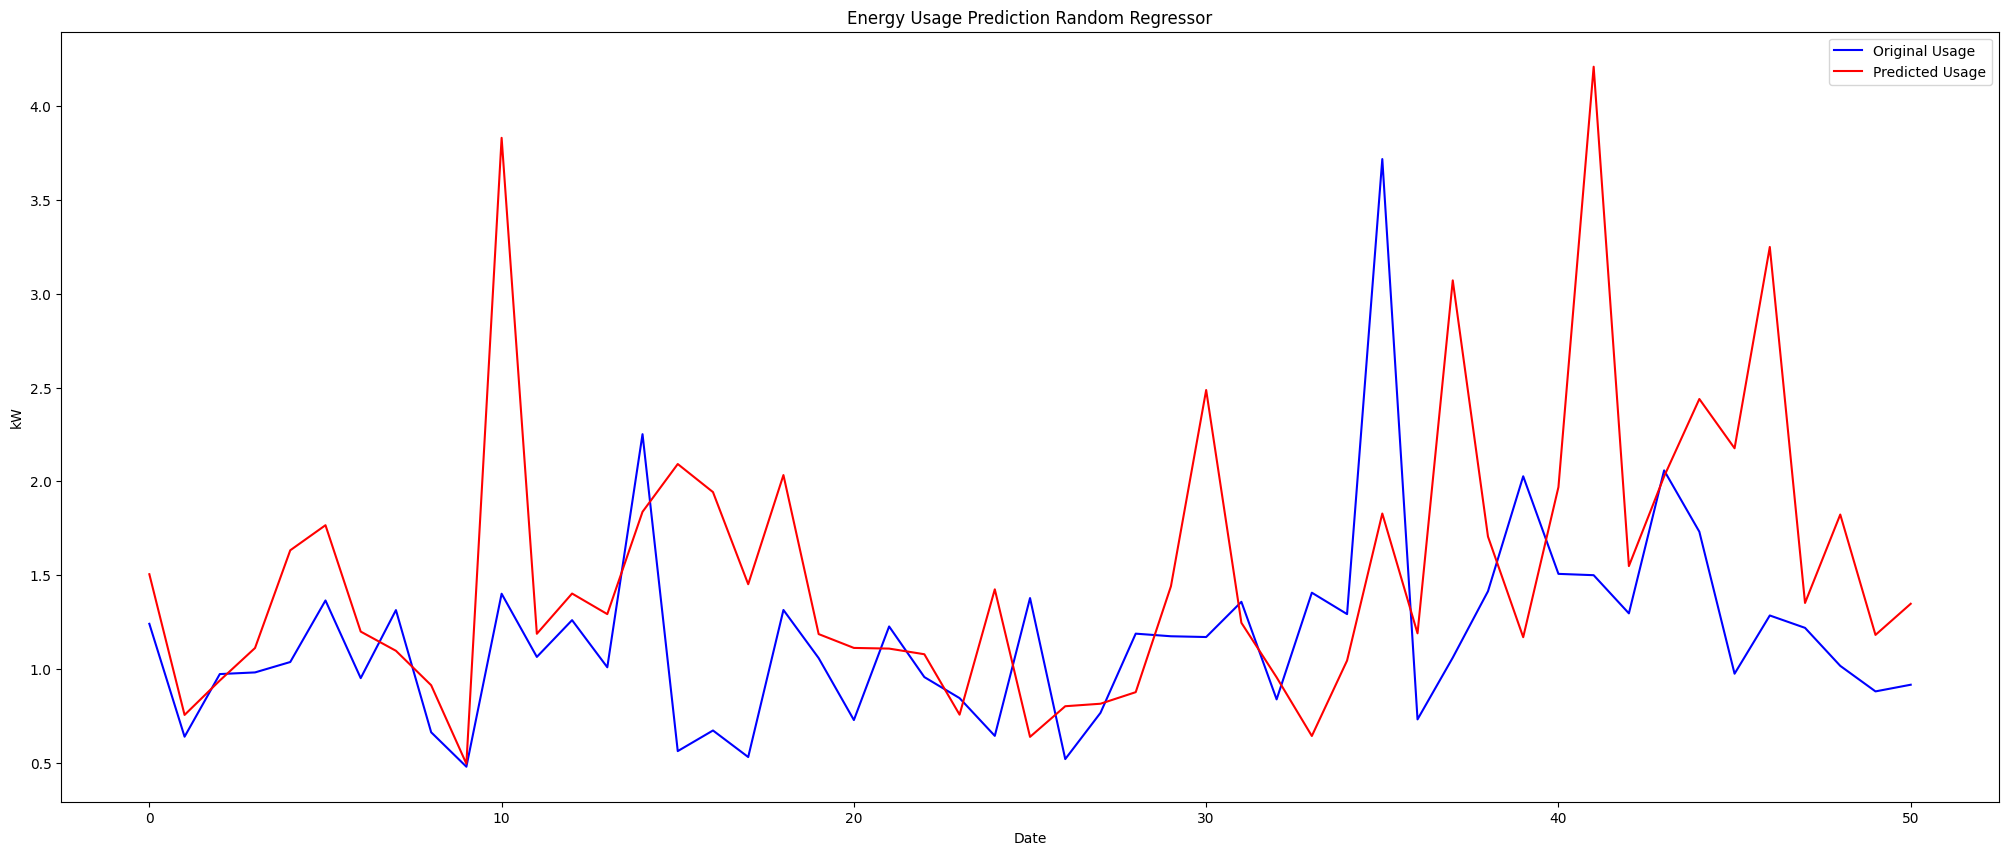

In [ ]:
predictions = rs_model.predict(x_test)
predictions = predictions.reshape(-1, 1)
plotPrediction(predictions,"Random Regressor")

In [ ]:
predict_df1 = pd.DataFrame(predictions, columns=['use'])

selected_range_start = val_end
selected_range_end = total_data_length
print(selected_range_start,selected_range_end)
selected_range = df_tmp.iloc[selected_range_start:selected_range_end]

predict_df1.index = selected_range.index

6835 8041


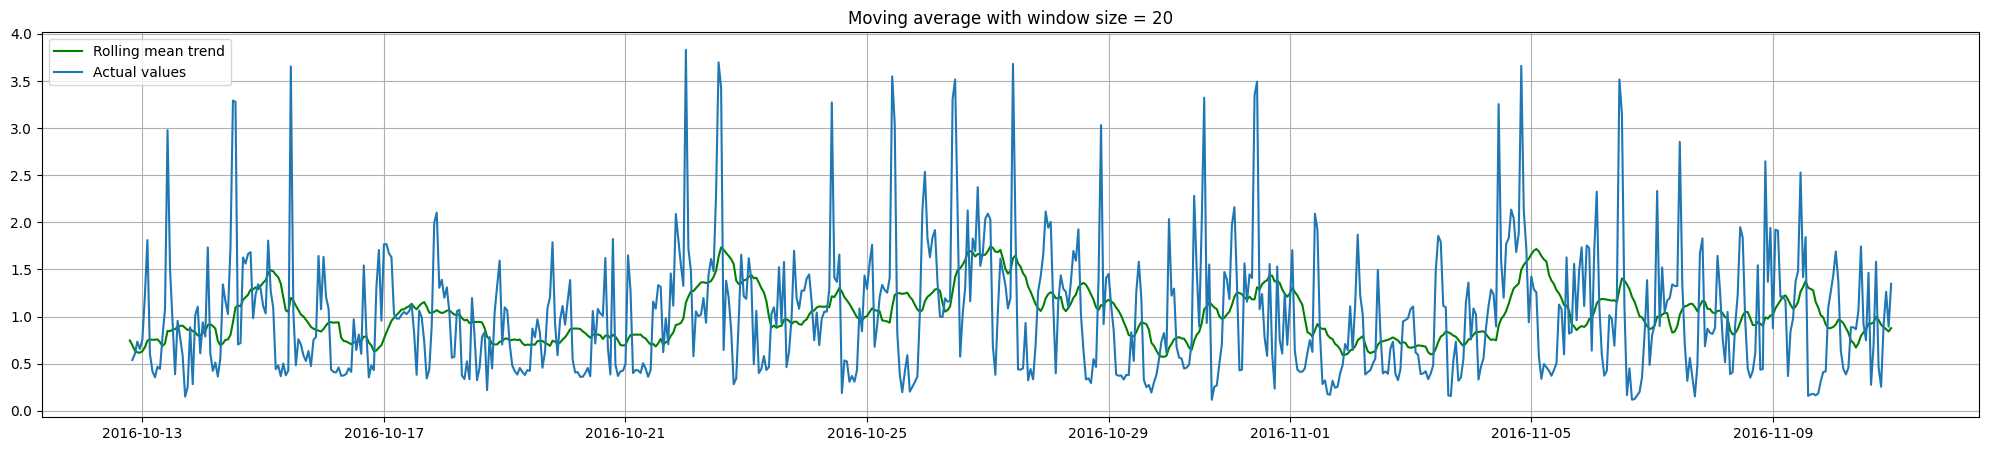

In [ ]:
plotMovingAverage(predict_df1[col][:n_samples],window=20)

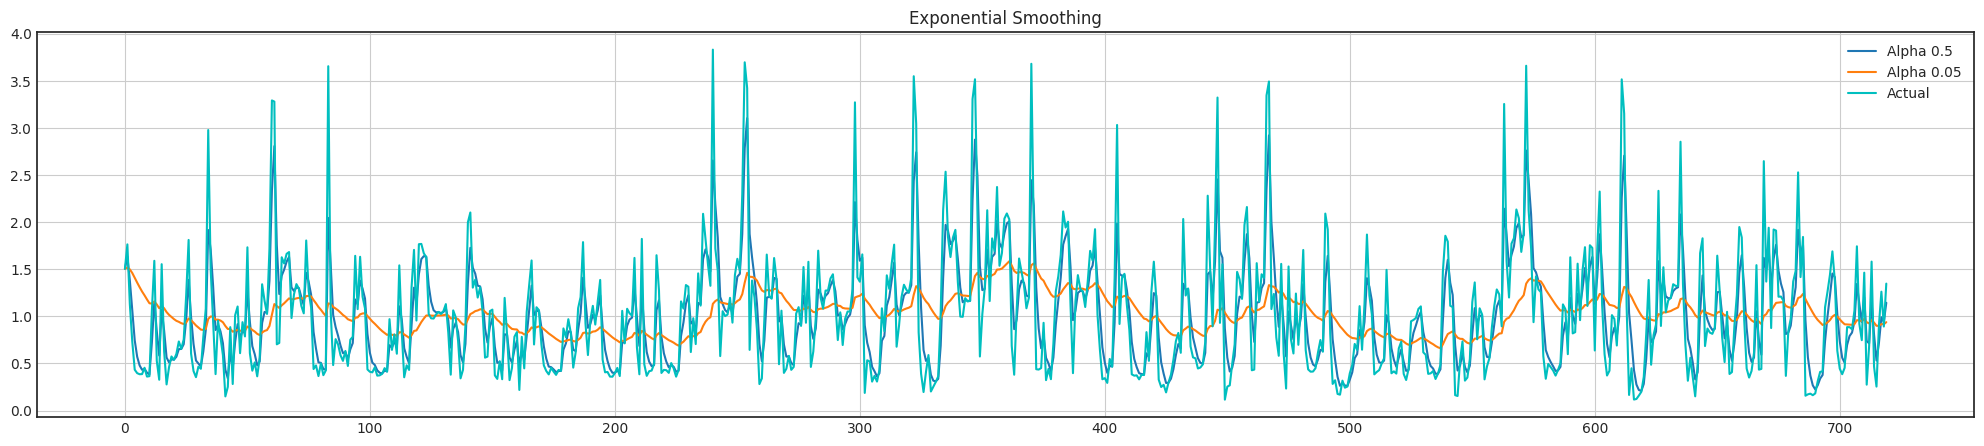

In [ ]:
plotExponentialSmoothing(predict_df1[col][:n_samples], [0.5, 0.05])

In [ ]:
show_scores(rs_model)

c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


{'Traning MAE': 0.05590938866889832,
 'Training RMSLE': 0.04103624716679254,
 'Training R^2': 0.9807493446165856,
 'Training MSE': 0.014634242542223147,
 'Validation MAE': 0.18802471159930856,
 'Validation RMSLE': 0.151407287321301,
 'Validation R^2': 0.7894937527649978,
 'Validation MSE': 0.14002749272523207}

c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


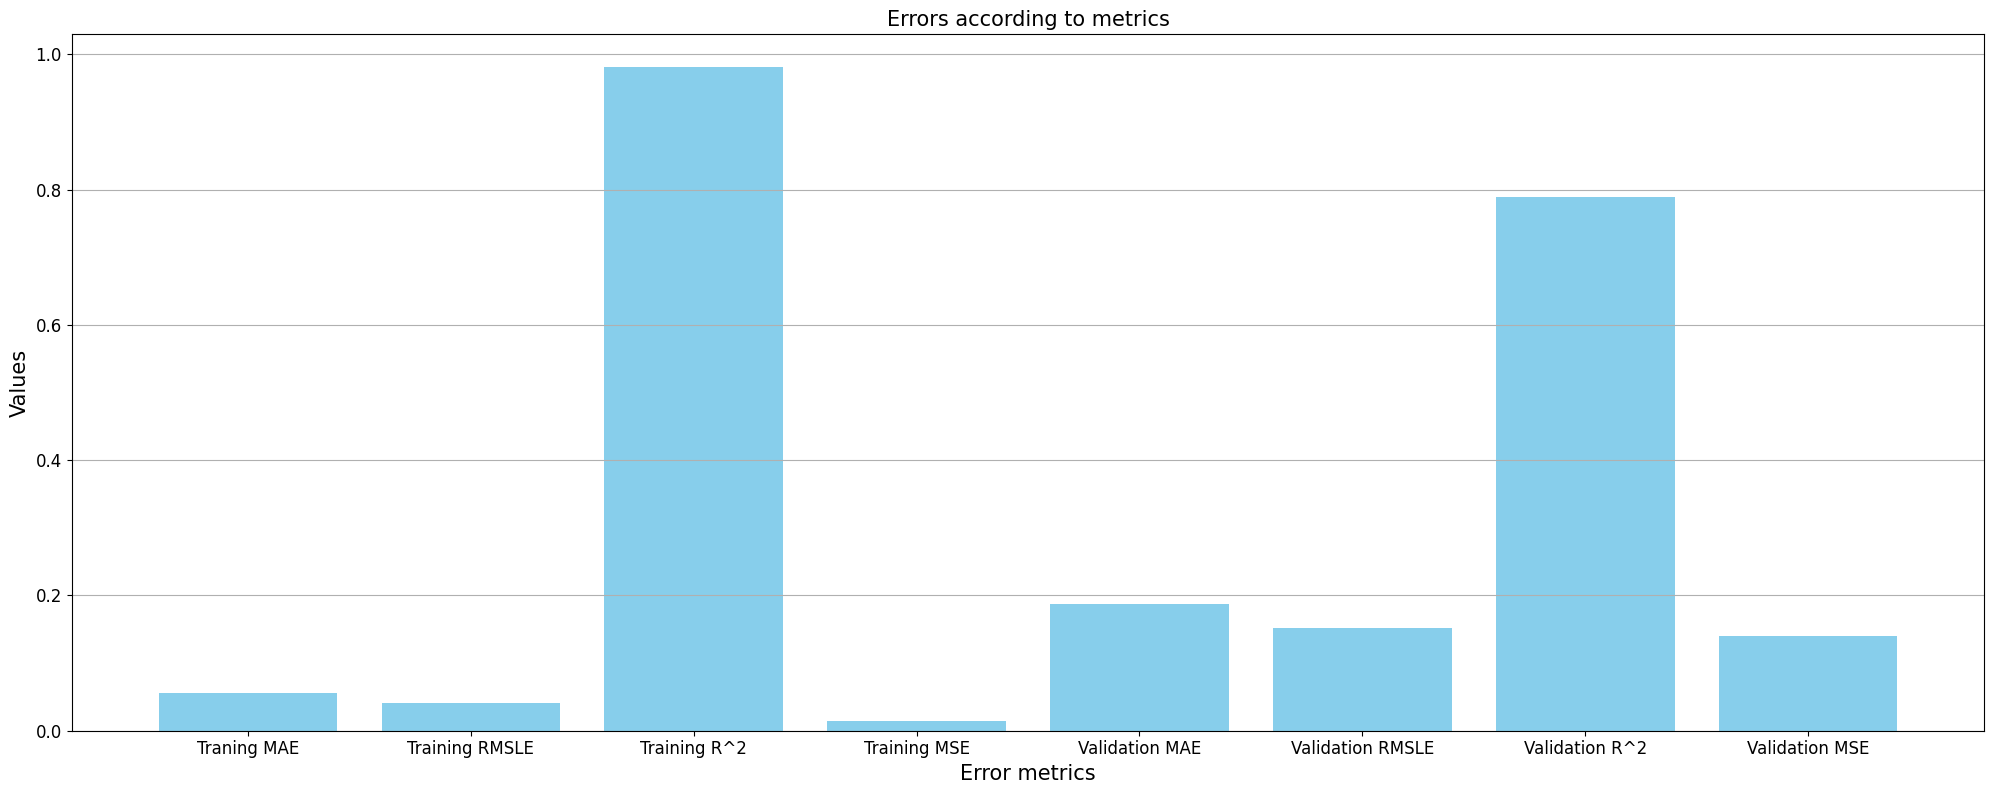

In [ ]:
plotScore(rs_model)

## Time-Series Prediction with SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(x_train, y_train)

SVR()

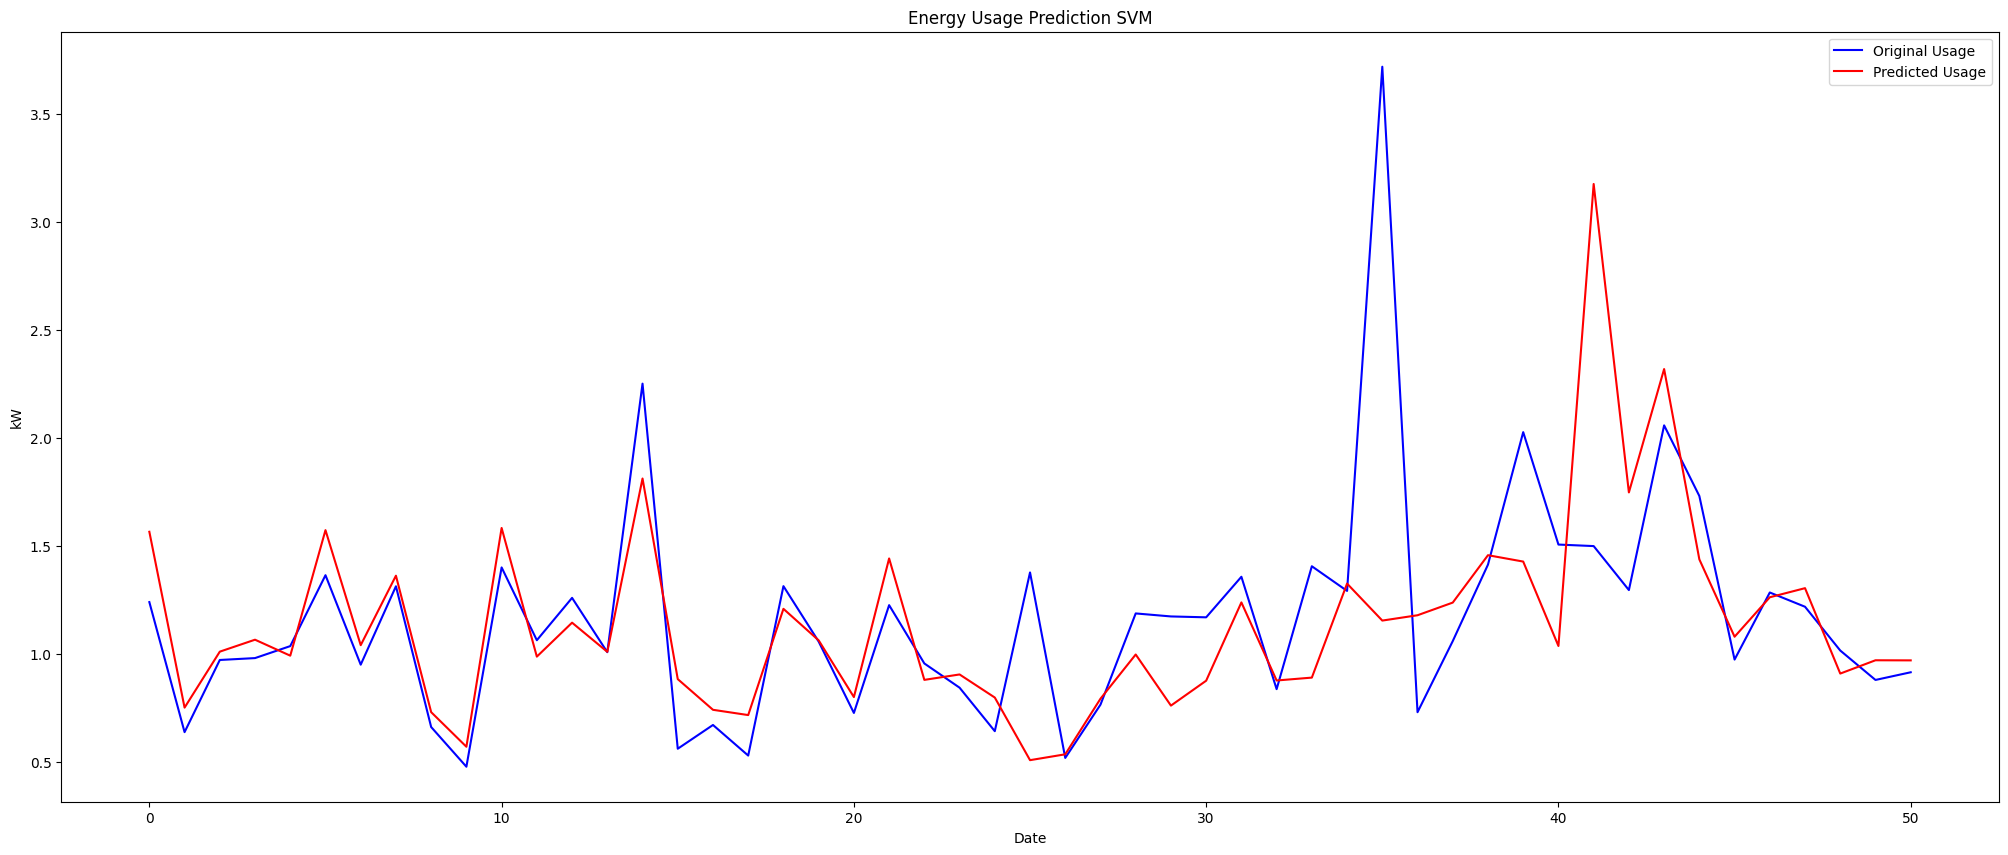

In [ ]:
predictions = svm_regressor.predict(x_test)
predictions = predictions.reshape(-1, 1)
plotPrediction(predictions, "SVM")

In [ ]:
predict_df = pd.DataFrame(predictions, columns=['use'])

selected_range_start = val_end
selected_range_end = total_data_length
print(selected_range_start,selected_range_end)
selected_range = df_tmp.iloc[selected_range_start:selected_range_end]

predict_df.index = selected_range.index

6835 8041


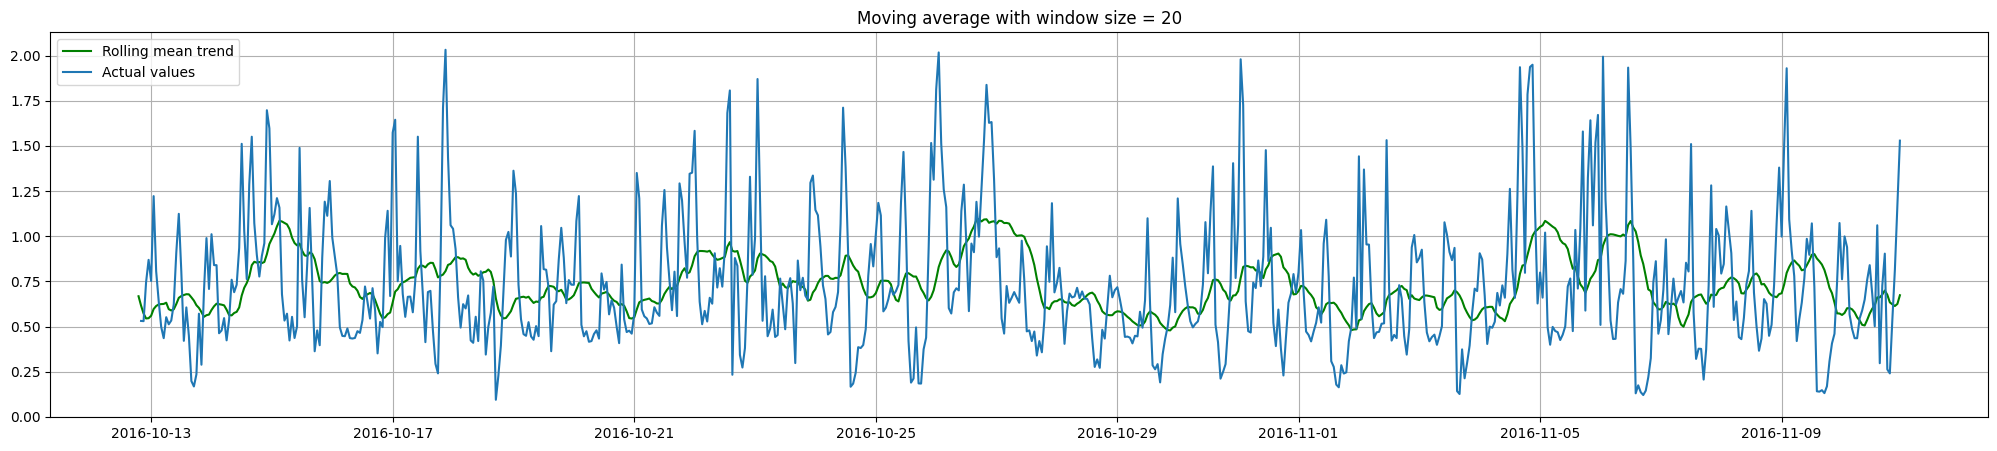

In [ ]:
plotMovingAverage(predict_df[col][:n_samples],window=20)

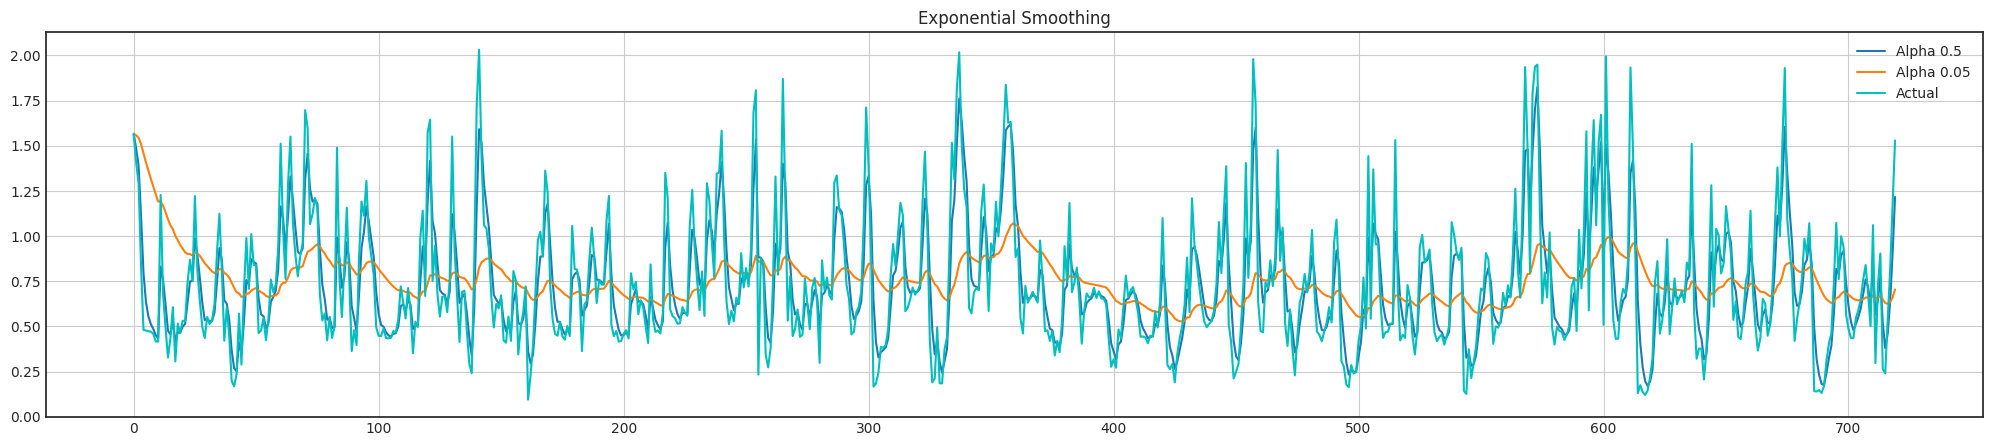

In [ ]:
plotExponentialSmoothing(predict_df[col][:n_samples], [0.5, 0.05])

In [ ]:
show_scores(svm_regressor)

c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


{'Traning MAE': 0.1430732484927217,
 'Training RMSLE': 0.10982063420392495,
 'Training R^2': 0.7757717410127319,
 'Training MSE': 0.1704570915371144,
 'Validation MAE': 0.49881536408087096,
 'Validation RMSLE': 0.3172319648686172,
 'Validation R^2': 0.05528872427798748,
 'Validation MSE': 0.6284162728003487}

c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


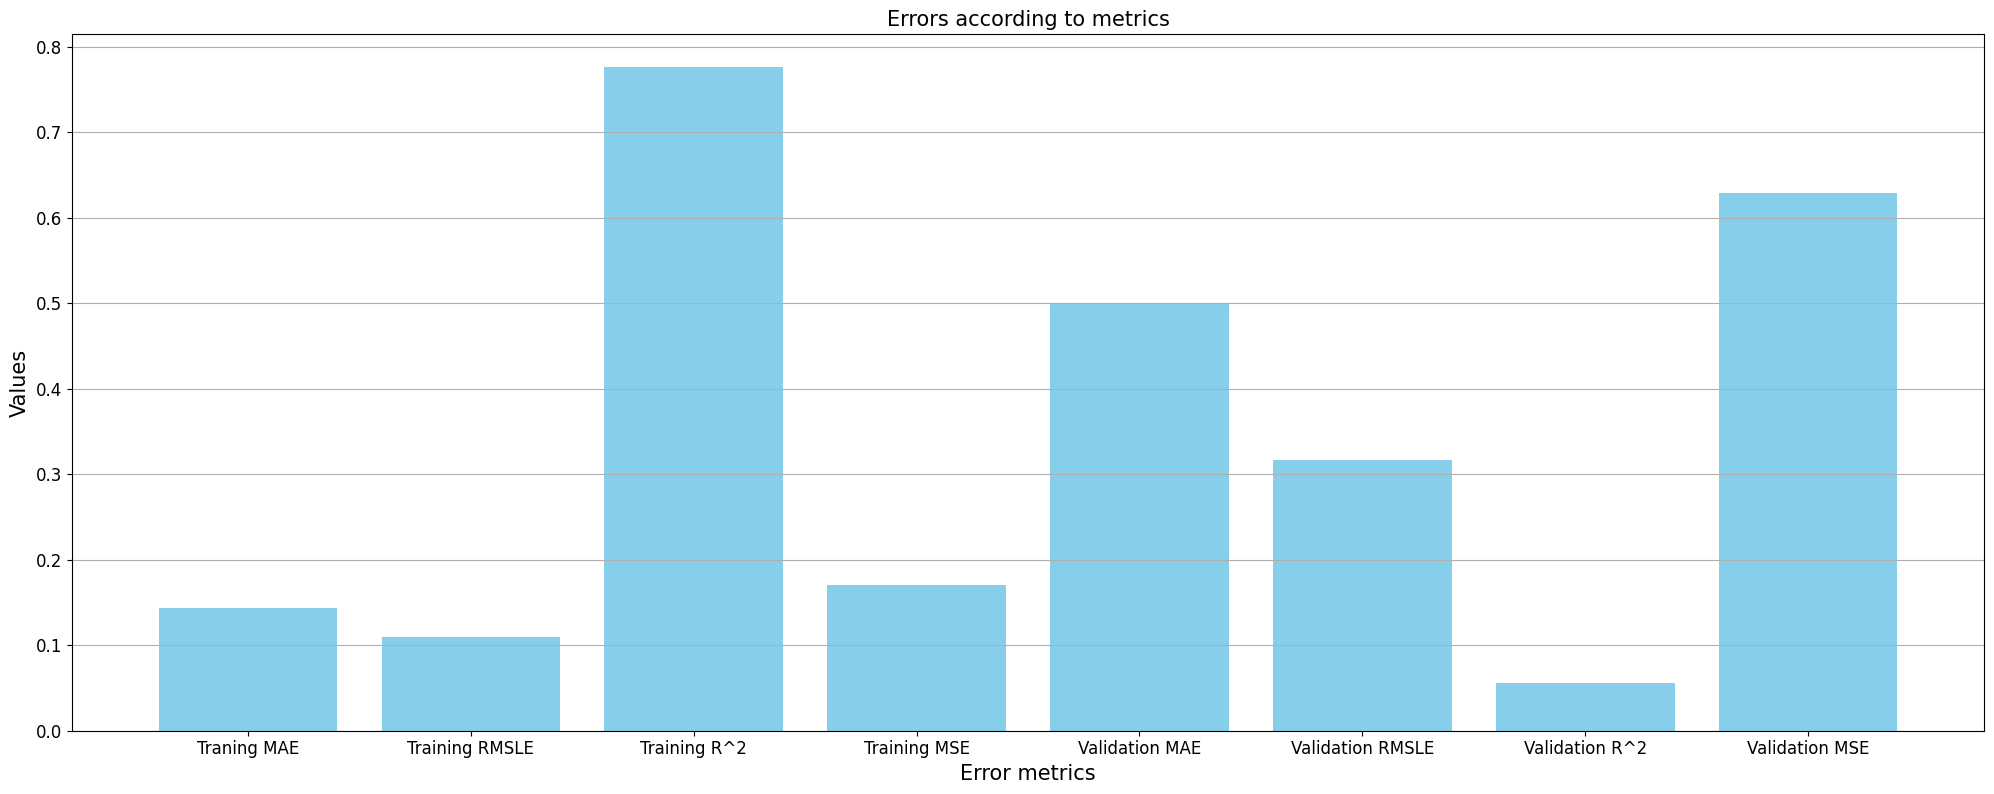

In [ ]:
plotScore(svm_regressor)

# Observing Peaks

#### We decided to Random Forest Regressor .

In [ ]:

predict_sorted = predict_df1.sort_values(by='use', ascending=False)
predict_sorted
# The values ​​in the first six percent of the data are the factor that most causes the peaks to occur.

use
2016-11-22 00:00:00  4.209768
2016-11-21 23:00:00  3.946631
2016-11-20 22:00:00  3.870687
2016-11-28 20:00:00  3.858175
2016-10-22 00:00:00  3.830783
...                       ...
2016-11-16 17:00:00  0.119111
2016-11-06 16:00:00  0.117263
2016-10-30 17:00:00  0.116377
2016-11-17 15:00:00  0.103778
2016-11-22 14:00:00  0.102344

[1206 rows x 1 columns]

# Inflexible-Semi-Flexible-Flexible Appliances
### Inflexible Appliances:
* `Furnace 1` and `Furnace 2 [kW]`: Heating systems typically need to operate at high performance during peak consumption times.
* `Well [kW]`: This typically provides essential water supply and might have limited flexibility in operation.
### Semi-Flexible Appliances:
* `Dishwasher [kW]`: It could have some flexibility in its operating time for washing cycles and might work in an economical mode.
* `Microwave [kW]`, `Fridge [kW]`, `Garage door [kW]` and `Wine Cellar [kW]`: These are usually constant energy-consuming devices, yet their operating times might have some flexibility.
According to this link: https://www.bosch-home.in/experience-bosch/living-with-bosch/fresh-reads/how-eco-mode-saves-energy#:~:text=In%20Eco%20mode%2C%20a%20wash,lamp%20for%20about%2028%20months. Eco mode saves 0.0597 kWh per hour.
### Flexible Appliances:
* `Home office [kW]`: Working hours here might be relatively flexible, especially for office functions.
* `Kitchen 12 [kW]`, `Kitchen 14 [kW]`, `Kitchen 38 [kW]`, `Living room [kW]`: The operating times of these appliances tend to be more flexible and can be programmed according to usage patterns and needs.
This classification is based on general tendencies, and for specific households, more nuanced planning and programming might be required. The usage of these appliances can exhibit flexibility and programmability based on demand.

# Crisis Management
* `In crisis scenario 1`, actions are taken for appliances located within the top 3% where the peak occurs. Processes are executed for all flexible and semi-flexible appliances in this range.

* `In crisis scenario 2`, actions are taken for appliances located between the 3% and 6% range where the peak occurs. Processes are executed for all semiflexible appliances within this range exclusively.

In [ ]:
import numpy as np
import datetime

inflexible = ["Furnace 1","Furnace 2","Well"]
semiflexible = ["Dishwasher", "Microwave","Fridge","Wine cellar","Garage door"]
flexiable = ["Home office","Kitchen 12","Kitchen 38","Living room"]

mean_use = np.mean(predict_df1['use'])
mins = [np.min(df_tmp["Home office"]), np.min(df_tmp["Kitchen 12"]), np.min(df_tmp["Kitchen 38"]), np.min(df_tmp["Microwave"]), np.min(df_tmp["Living room"])]
crisis_percentage1 = len(predict_sorted) * 3 // 100
crisis_percentage2 = len(predict_sorted) *6 //10

def update_usage(df, date, gadget, value):
    if df.loc[date, "use"]>2*value:
        df.loc[date, "use"] -= value
        df.loc[date, gadget] -= value

def crisis_one(df, predict_sorted, df_tmp, crisis_percentage1, min_vals, flexiable):
    for i in range(crisis_percentage1):
        current_date = predict_sorted.index[i]
        for j in range(len(predict_df1)):
            future_date = current_date + datetime.timedelta(days=j)
            past_date = current_date - datetime.timedelta(days=j)
            for k in range(len(flexiable)):
                try:
                    use_diff_future = df_tmp.loc[current_date, "use"] - df_tmp.loc[future_date, flexiable[k]]
                    use_diff_past = df_tmp.loc[current_date, "use"] - df_tmp.loc[past_date, flexiable[k]]
                    if 2.778 >= use_diff_future >= 1.389 and 2.778 >= use_diff_past >= 1.389:
                        df_tmp.loc[current_date, "use"] -= df_tmp.loc[future_date, flexiable[k]]
                        df_tmp.loc[future_date, "use"] += df_tmp.loc[current_date, flexiable[k]]
                        df_tmp.loc[current_date, flexiable[k]] = min_vals[k]
                        break
                except KeyError:
                    continue

        for object in semiflexible:
            update_usage(df_tmp, current_date, object, 0.0597)

def crisis_two(df_tmp, predict_sorted, crisis_percentage1, crisis_percentage2, semiflexible):
    for i in range(crisis_percentage1, crisis_percentage2):
        current_date = predict_sorted.index[i]
        for obj in semiflexible:
            update_usage(df_tmp, current_date, obj, 0.0597)

crisis_one(df_tmp, predict_sorted, df_tmp, crisis_percentage1, mins, flexiable)
crisis_two(df_tmp, predict_sorted, crisis_percentage1, crisis_percentage2, semiflexible)

## Reevaluate And Grade Calculation

In [ ]:
training_features = df_tmp[['gen', 'Dishwasher', 'Furnace 1', 'Furnace 2',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room']]
energy_use = df_tmp['use']
training_features = training_features['2016-01-02 05:00:00':'2016-12-02 05:00:00']
training_features['yesterday_use'] = energy_use['2016-01-01 05:00:00':'2016-12-01 05:00:00'].values
energy_use = df_tmp['use']['2016-01-02 05:00:00':'2016-12-02 05:00:00']
training_features.shape, energy_use.shape

((8041, 16), (8041,))

In [ ]:
total_data_length = len(training_features)
train_end = int(total_data_length * 0.7)+1
val_end = int(total_data_length * 0.85)+1
x_train = training_features[:train_end]
y_train = energy_use[:train_end]
x_val = training_features[train_end:val_end]
y_val = energy_use[train_end:val_end]
x_test = training_features[val_end:]
y_test = energy_use[val_end:]
x_train.shape, y_train.shape,x_val.shape, y_val.shape, x_test.shape, y_test.shape

((5629, 16), (5629,), (1206, 16), (1206,), (1206, 16), (1206,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions =rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

#Fit the RandomizedSearchCV model
rs_model.fit(x_train.values.reshape(-1, x_train.values.shape[1]), y_train.values)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=True)

c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


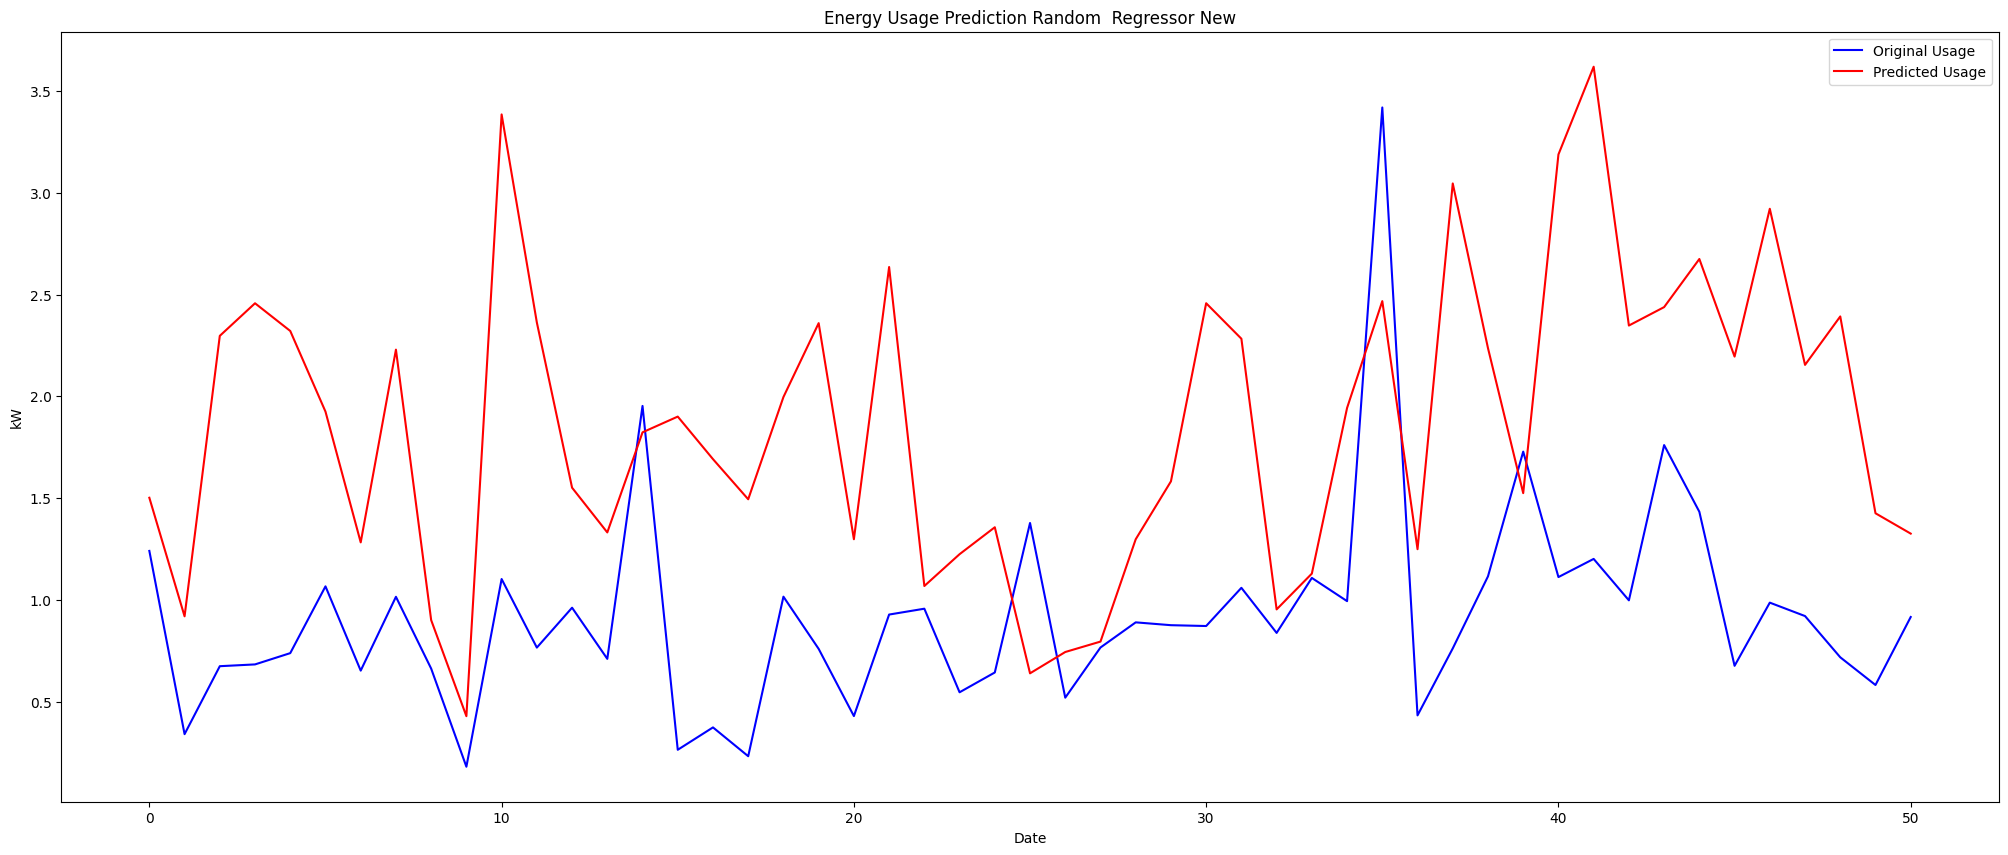

In [ ]:
predictions = rs_model.predict(x_test)
predictions = predictions.reshape(-1, 1)
plotPrediction(predictions,"Random  Regressor New")

In [ ]:
predict_df = pd.DataFrame(predictions, columns=['use'])

selected_range_start = val_end
selected_range_end = total_data_length
print(selected_range_start,selected_range_end)
selected_range = df_tmp.iloc[selected_range_start:selected_range_end]

predict_df.index = selected_range.index

6835 8041


In [ ]:
show_scores(rs_model)

c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


{'Traning MAE': 0.06697549449023074,
 'Training RMSLE': 0.050826204105022386,
 'Training R^2': 0.9693849976404946,
 'Training MSE': 0.023273356726635885,
 'Validation MAE': 0.19232255125666362,
 'Validation RMSLE': 0.15495973843835498,
 'Validation R^2': 0.7802196232396656,
 'Validation MSE': 0.14627012377218288}

c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Asus F15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


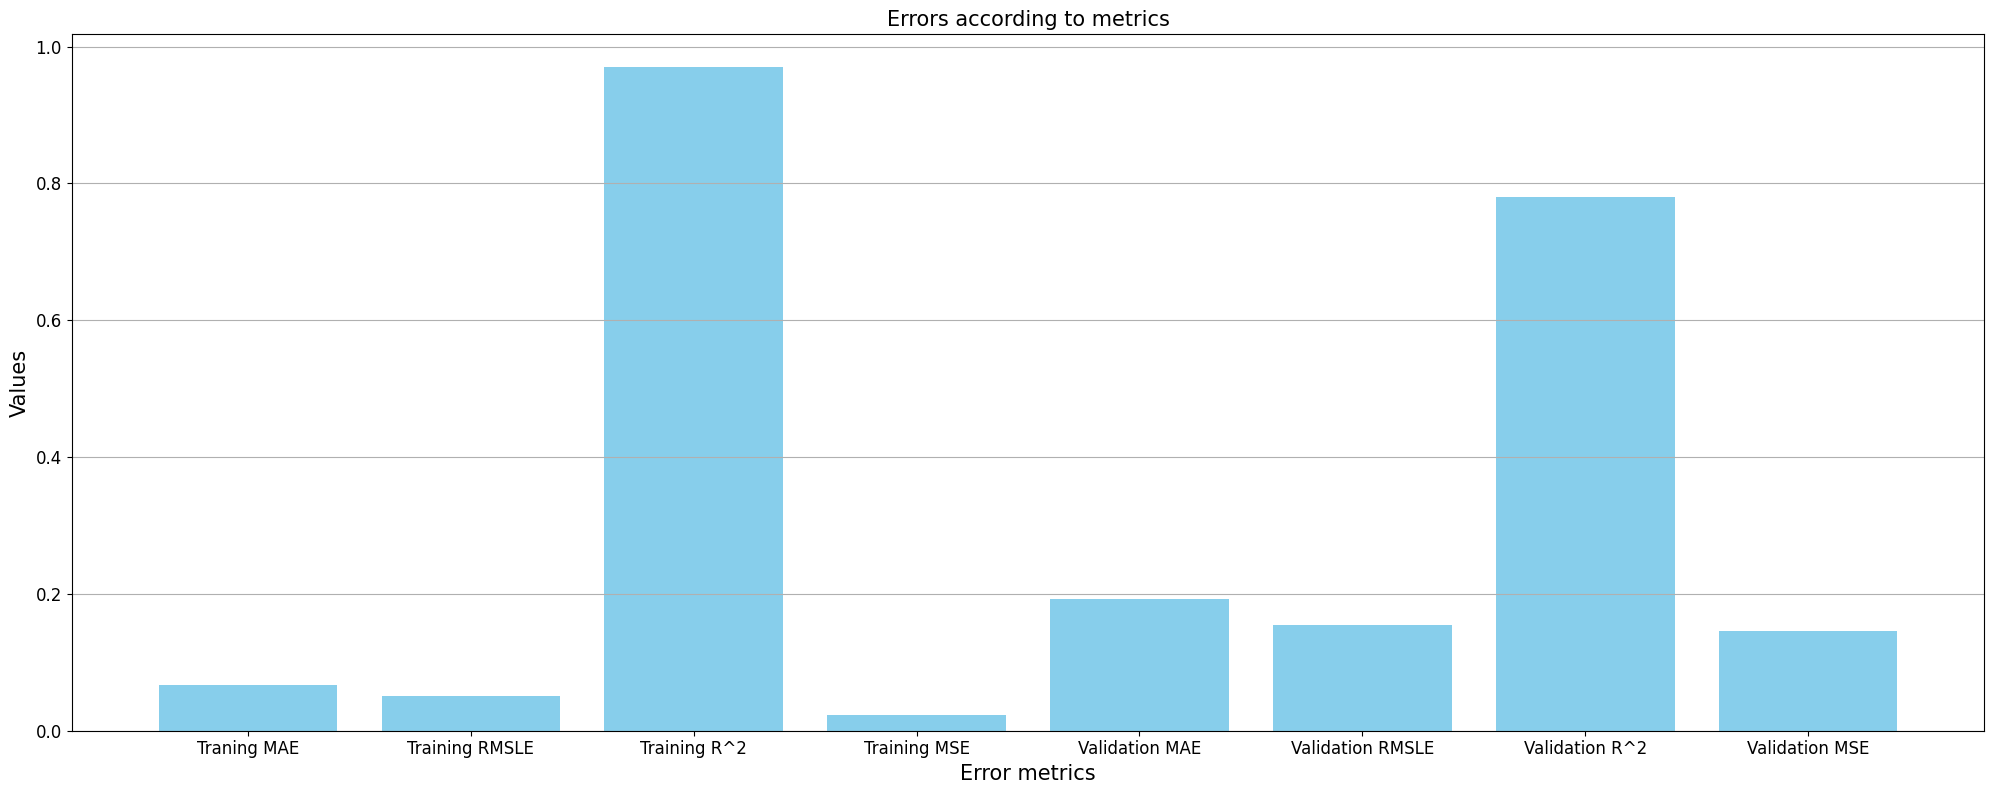

In [ ]:
plotScore(rs_model)

# Final Calculation cost of energy useage

In [ ]:
result_last=calculateCost(y_test)
savings_percentage = ((result_first - result_last) / result_first) * 100
print(f"The homeowners have achieved savings of {savings_percentage:.2f}% through this approach.")

The homeowners have achieved savings of 17.87% through this approach.


# Useage Visualization

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Usage (kW)')]

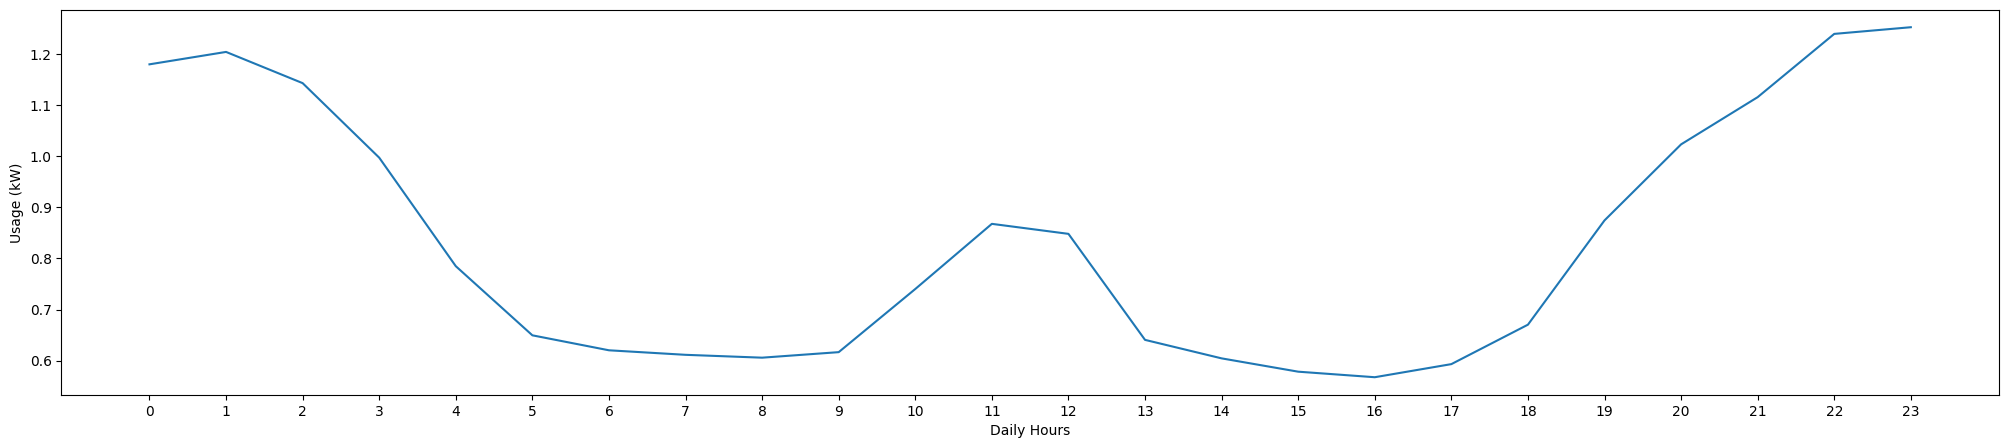

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()['use'].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Usage (kW)')

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Home office (kW)')]

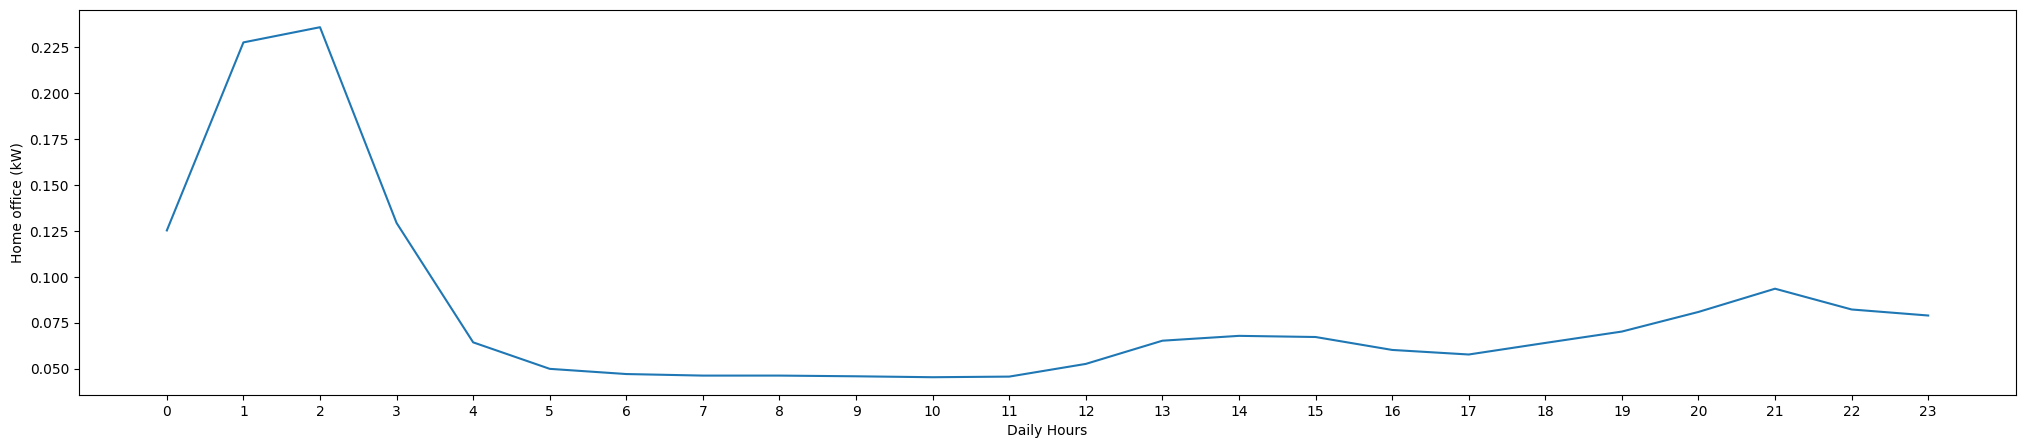

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()["Home office"].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Home office (kW)')

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Kitchen 12 (kW)')]

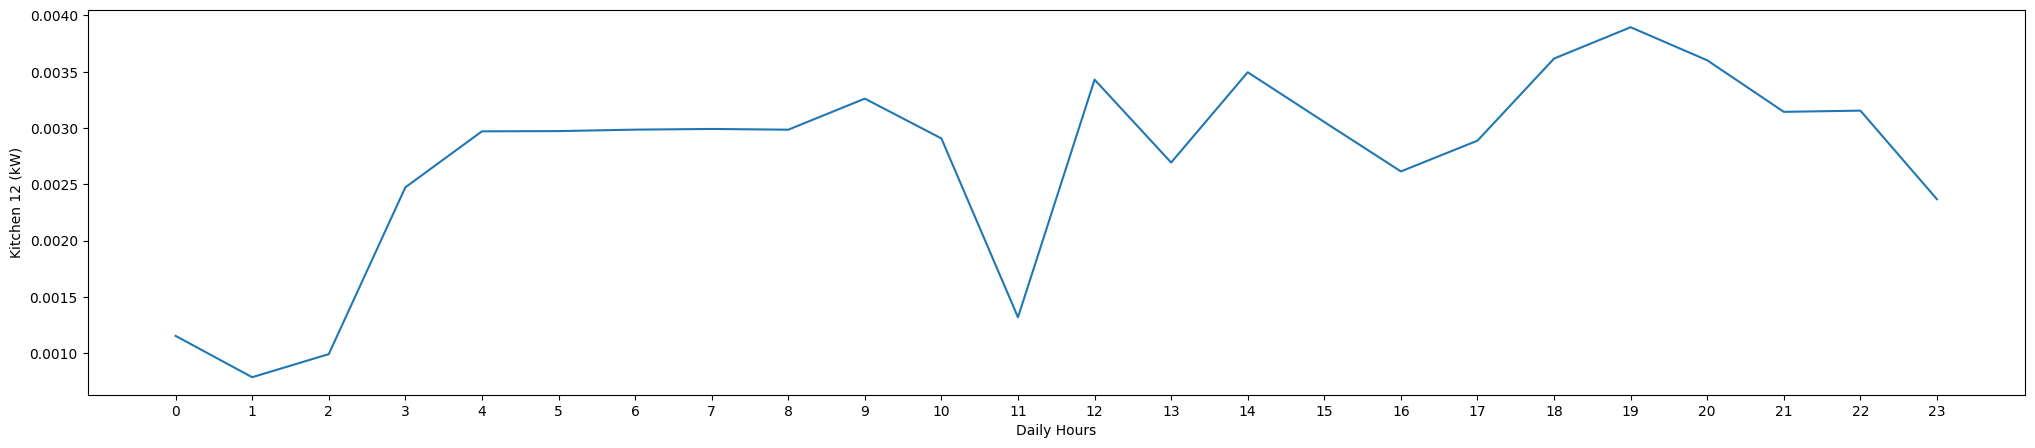

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()["Kitchen 12"].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel="Kitchen 12 (kW)")

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Kitchen 38 (kW)')]

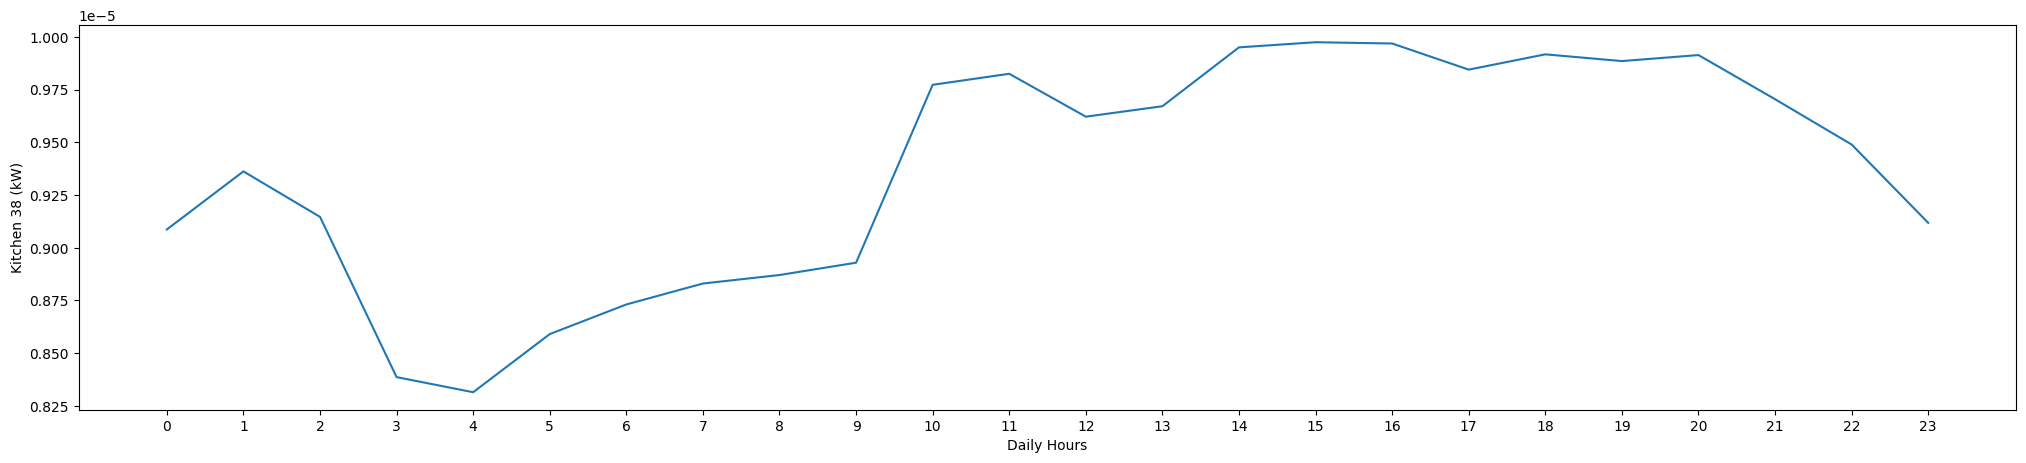

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()["Kitchen 38"].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel="Kitchen 38 (kW)")

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Microwave')]

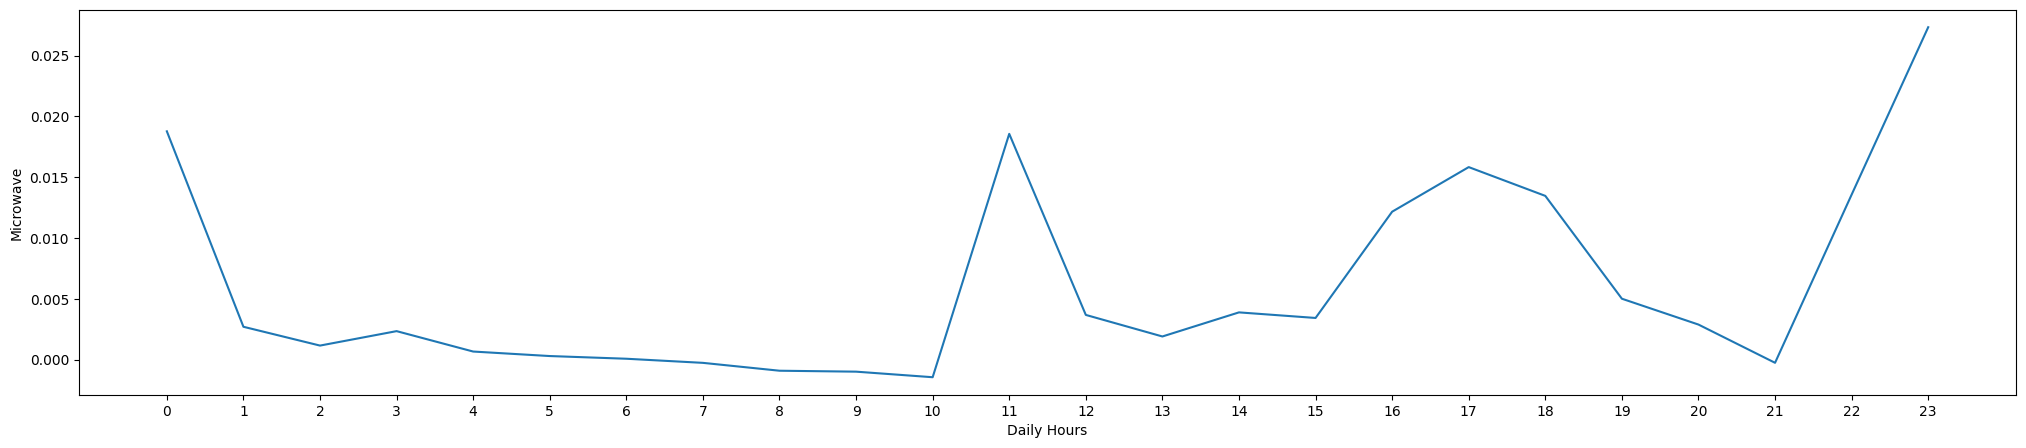

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()["Microwave"].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel="Microwave")

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Living room')]

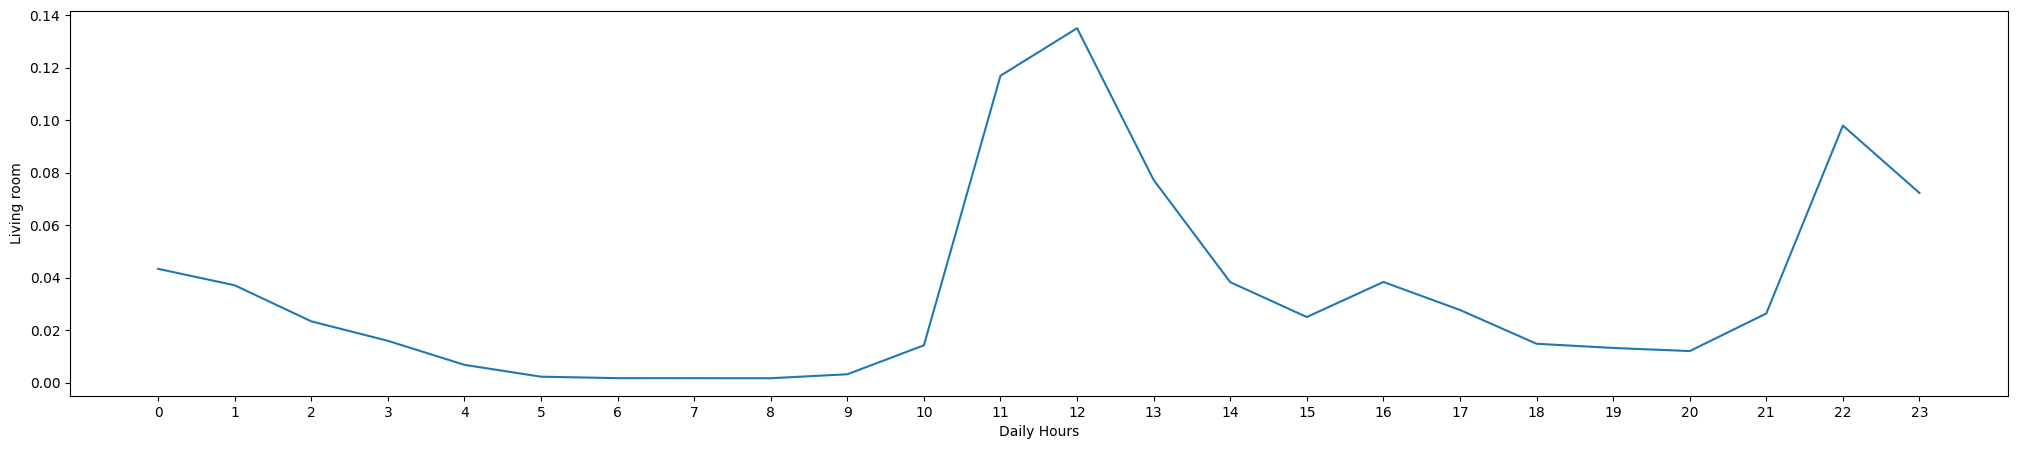

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()["Living room"].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel="Living room")

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Dishwasher')]

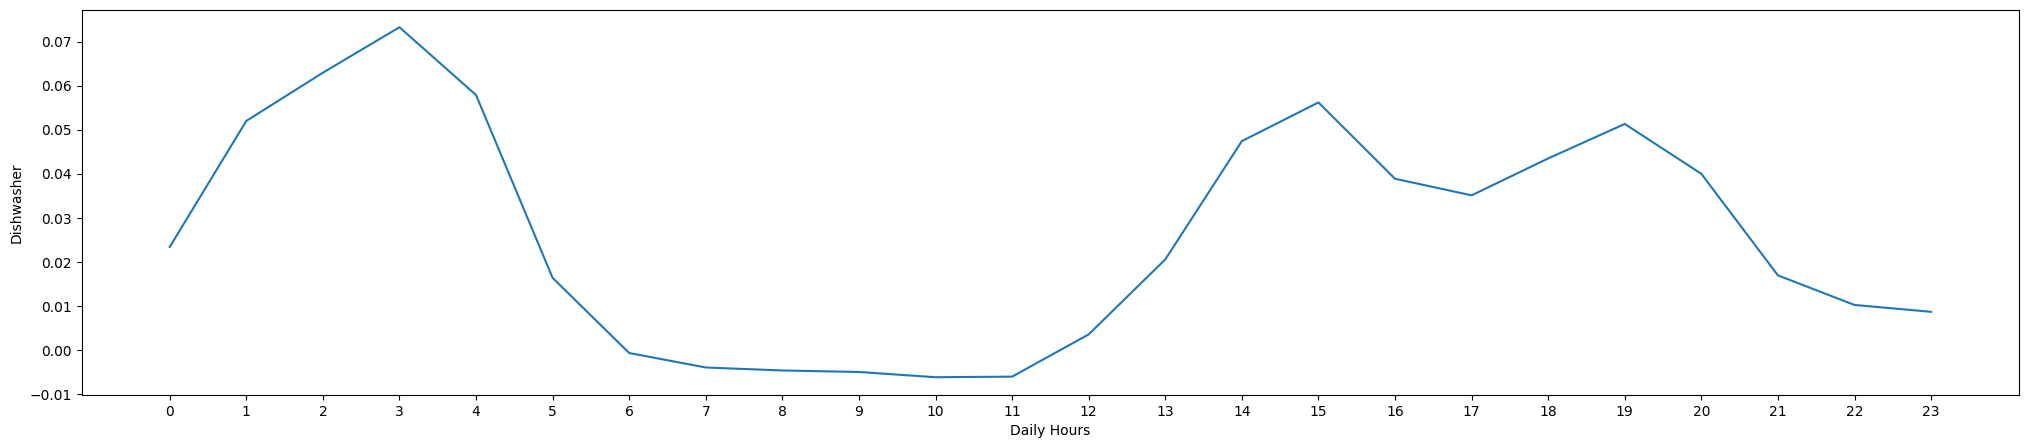

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()["Dishwasher"].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel="Dishwasher")

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Fridge')]

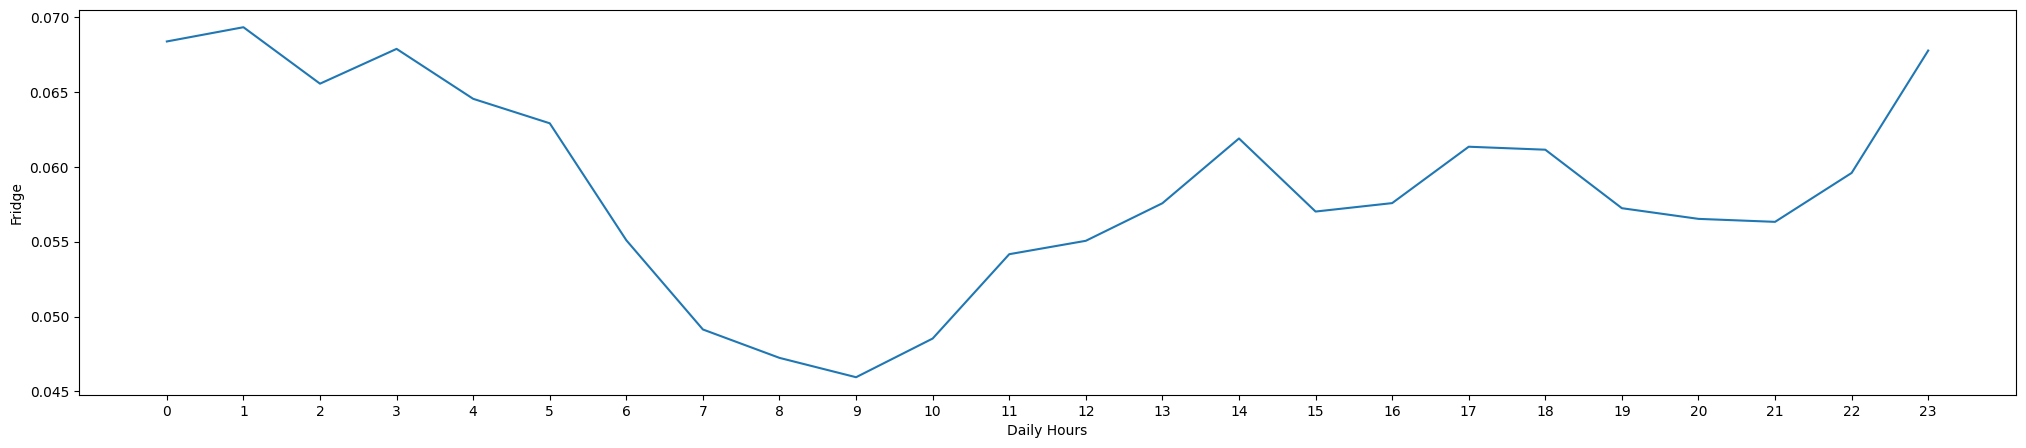

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()["Fridge"].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel="Fridge")

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Wine cellar')]

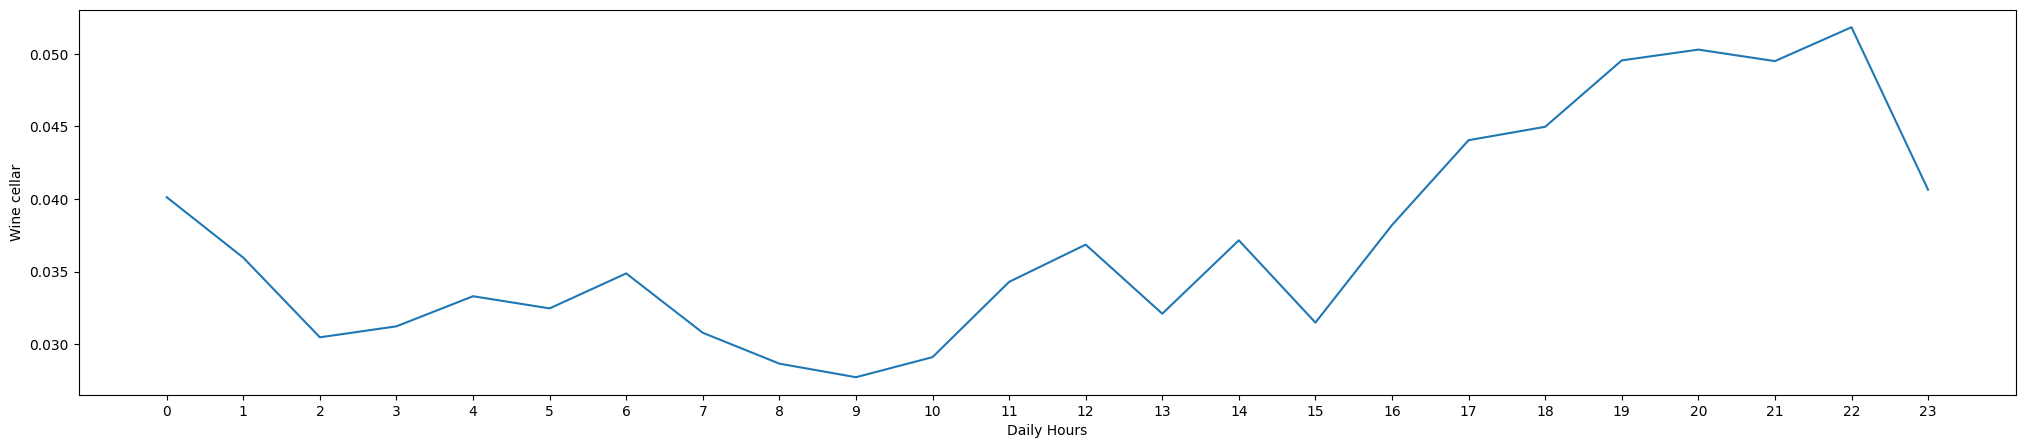

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()["Wine cellar"].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel="Wine cellar")

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Garage door')]

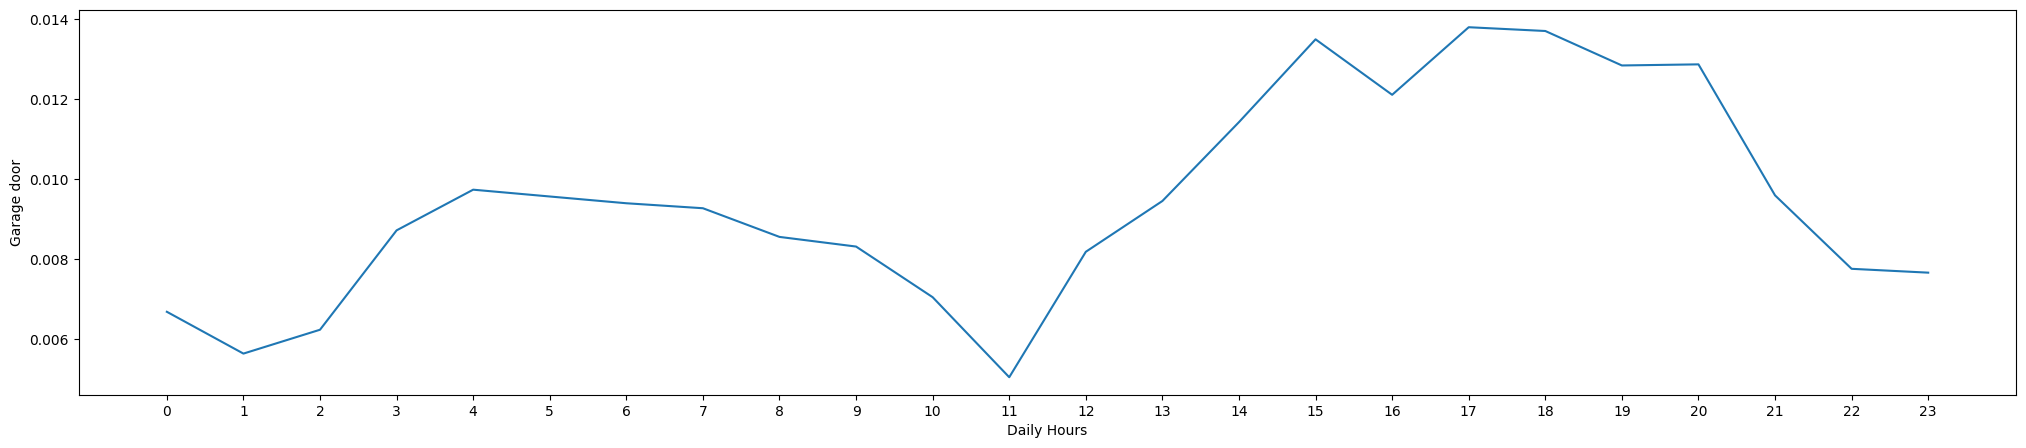

In [ ]:
df_tmp.groupby(df_tmp.index.hour).mean()["Garage door"].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel="Garage door")